`House Price Prediction with Linear and Tree-Based Regressors`

`July 2024`

This project aims to predict house prices based on a dataset of house features. The dataset contains 79 features, and the target variable is the sale price of the houses. To achieve the goal, we develop various regression models and compare their performance for the best prediction, including linear regression, Lasso regression, Ridge regression, ElasticNet, random forest, and XGBoost.

`Any questions, please reach out!`

Chiawei Wang, PhD\
Data & Product Analyst\
<chiawei.w@outlook.com>

`*` Note that the table of contents and other links may not work directly on GitHub.

[Table of Contents](#table-of-Contents)
1. [Executive Summary](#Executive-Summary)
   - [Overview](#Overview)
   - [Problem](#Problem)
   - [Solution](#Solution)
   - [Sample of predictions](#Sample-of-predictions)
2. [Planning Stage](#Planning-Stage)
   - [Description of variables](#Description-of-variables)
   - [Understanding and preprocessing data](#Understanding-and-preprocessing-data)
3. [Analysing Stage](#Analysing-Stage)
   - [Exploratory data analysis](#Exploratory-data-analysis)
   - [Feature engineering](#Feature-engineering)
4. [Constructing Stage](#Constructing-Stage)
   - [Model selection](#Model-selection)
      - [Linear regression model](#Linear-regression-model)
      - [Lasso regression model: L1 regularisation](#Lasso-regression-model-L1-regularisation)
      - [Ridge regression model: L2 regularisation](#Ridge-regression-model-L2-regularisation)
      - [ElasticNet regularisation model: L1 and L2 regularisations](#ElasticNet-regularisation-model-L1-and-L2-regularisations)
      - [Random forest model](#Random-forest-model)
      - [XGBoost model](#XGBoost-model)
   - [Metric comparison](#Metric-comparison)
   - [Sample submission](#Sample-submission)
5. [Executing Stage](#Executing-Stage)
   - [Conclusion](#Conclusion)

# Executive Summary

## Overview

When we ask a home buyer to describe their dream house, they are unlikely to start with details like the basement ceiling height or the proximity to an east-west railroad. However, this dataset demonstrates that numerous factors influence price negotiations beyond basic features like the number of bedrooms or the presence of a white-picket fence.

With 79 explanatory variables that encompass almost every aspect of residential homes in Ames, Iowa, this task involves predicting the final price of each home.

## Problem

The business objective is to accurately forecast the sales price of each house. This entails predicting the SalePrice variable for each Id in the test dataset.

## Solution

We use feature engineering techniques to manage missing values, encode categorical variables, and generate new features from the dataset. Our predictive models employ linear regression, Lasso regression, Ridge regression, ElasticNet, random forest, and XGBoost to forecast house prices. Subsequently, we refine these models through hyperparameter optimisation to enhance their predictive accuracy.

The evaluation metric used for the model are the mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and r-squared (R<sup>2</sup>), calculated between the logarithm of the predicted values and actual sales prices. The best model should minimise these metrics except for r-squared, which should be maximised.

## Sample of predictions

| Id   | SalePrice |
|------|-----------|
| 1461 | 120627.16 |
| 1462 | 177622.50 |
| 1463 | 184764.81 |
| 1464 | 195299.53 |
| 1465 | 177502.78 |
| 1466 | 175114.53 |
| 1467 | 169044.92 |
| 1468 | 186549.36 |
| 1469 | 120703.46 |
| 1470 | 204283.36 |

# Planning Stage

The planning stage involves conceptualising the project scope and outlining steps for completion. Key tasks include researching business data, defining project scope, developing workflows and assessing stakeholder needs.

## Description of variables

| Variable        | Type    | Description                                                 |
| --------------- | ------- | ----------------------------------------------------------- |
| `Id`            | int64   | The identifier of the property                              |
| `MSSubClass`    | int64   | The building class                                          |
| `MSZoning`      | str     | The general zoning classification                           |
| `LotFrontage`   | float64 | Linear feet of street connected to property                 |
| `LotArea`       | int64   | Lot size in square feet                                     |
| `Street`        | str     | Type of road access                                         |
| `Alley`         | str     | Type of alley access                                        |
| `LotShape`      | str     | General shape of property                                   |
| `LandContour`   | str     | Flatness of the property                                    |
| `Utilities`     | str     | Type of utilities available                                 |
| `LotConfig`     | str     | Lot configuration                                           |
| `LandSlope`     | str     | Slope of property                                           |
| `Neighborhood`  | str     | Physical locations within Ames city limits                  |
| `Condition1`    | str     | Proximity to main road or railroad                          |
| `Condition2`    | str     | Proximity to main road or railroad (if a second is present) |
| `BldgType`      | str     | Type of dwelling                                            |
| `HouseStyle`    | str     | Style of dwelling                                           |
| `OverallQual`   | int64   | Overall material and finish quality                         |
| `OverallCond`   | int64   | Overall condition rating                                    |
| `YearBuilt`     | int64   | Original construction date                                  |
| `YearRemodAdd`  | int64   | Remodel date                                                |
| `RoofStyle`     | str     | Type of roof                                                |
| `RoofMatl`      | str     | Roof material                                               |
| `Exterior1st`   | str     | Exterior covering on house                                  |
| `Exterior2nd`   | str     | Exterior covering on house (if more than one material)      |
| `MasVnrType`    | str     | Masonry veneer type                                         |
| `MasVnrArea`    | float64 | Masonry veneer area in square feet                          |
| `ExterQual`     | str     | Exterior material quality                                   |
| `ExterCond`     | str     | Present condition of the material on the exterior           |
| `Foundation`    | str     | Type of foundation                                          |
| `BsmtQual`      | str     | Height of the basement                                      |
| `BsmtCond`      | str     | General condition of the basement                           |
| `BsmtExposure`  | str     | Walkout or garden level basement walls                      |
| `BsmtFinType1`  | str     | Quality of basement finished area                           |
| `BsmtFinSF1`    | int64   | Type 1 finished square feet                                 |
| `BsmtFinType2`  | str     | Quality of second finished area (if present)                |
| `BsmtFinSF2`    | int64   | Type 2 finished square feet                                 |
| `BsmtUnfSF`     | int64   | Unfinished square feet of basement area                     |
| `TotalBsmtSF`   | int64   | Total square feet of basement area                          |
| `Heating`       | str     | Type of heating                                             |
| `HeatingQC`     | str     | Heating quality and condition                               |
| `CentralAir`    | str     | Central air conditioning                                    |
| `Electrical`    | str     | Electrical system                                           |
| `1stFlrSF`      | int64   | First Floor square feet                                     |
| `2ndFlrSF`      | int64   | Second floor square feet                                    |
| `LowQualFinSF`  | int64   | Low quality finished square feet (all floors)               |
| `GrLivArea`     | int64   | Above grade (ground) living area square feet                |
| `BsmtFullBath`  | int64   | Basement full bathrooms                                     |
| `BsmtHalfBath`  | int64   | Basement half bathrooms                                     |
| `FullBath`      | int64   | Full bathrooms above grade                                  |
| `HalfBath`      | int64   | Half baths above grade                                      |
| `BedroomAbvGr`  | int64   | Number of bedrooms above basement level                     |
| `KitchenAbvGr`  | int64   | Number of kitchens                                          |
| `KitchenQual`   | str     | Kitchen quality                                             |
| `TotRmsAbvGrd`  | int64   | Total rooms above grade (does not include bathrooms)        |
| `Functional`    | str     | Home functionality rating                                   |
| `Fireplaces`    | int64   | Number of fireplaces                                        |
| `FireplaceQu`   | str     | Fireplace quality                                           |
| `GarageType`    | str     | Garage location                                             |
| `GarageYrBlt`   | float64 | Year garage was built                                       |
| `GarageFinish`  | str     | Interior finish of the garage                               |
| `GarageCars`    | int64   | Size of garage in car capacity                              |
| `GarageArea`    | int64   | Size of garage in square feet                               |
| `GarageQual`    | str     | Garage quality                                              |
| `GarageCond`    | str     | Garage condition                                            |
| `PavedDrive`    | str     | Paved driveway                                              |
| `WoodDeckSF`    | int64   | Wood deck area in square feet                               |
| `OpenPorchSF`   | int64   | Open porch area in square feet                              |
| `EnclosedPorch` | int64   | Enclosed porch area in square feet                          |
| `3SsnPorch`     | int64   | Three season porch area in square feet                      |
| `ScreenPorch`   | int64   | Screen porch area in square feet                            |
| `PoolArea`      | int64   | Pool area in square feet                                    |
| `PoolQC`        | str     | Pool quality                                                |
| `Fence`         | str     | Fence quality                                               |
| `MiscFeature`   | str     | Miscellaneous feature not covered in other categories       |
| `MiscVal`       | int64   | Value of miscellaneous feature                              |
| `MoSold`        | int64   | Month Sold                                                  |
| `YrSold`        | int64   | Year Sold                                                   |
| `SaleType`      | str     | Type of sale                                                |
| `SaleCondition` | str     | Condition of sale                                           |
| `SalePrice`     | int64   | The property's sale price in USD                            |

Please refer to the [data description](https://github.com/x-square/case_studies/blob/main/24_07_house_price_data_description.txt 'House price prediction data description') for a comprehensive overview of the variables and their values.

## Understanding and preprocessing data

The training dataset contains 1460 observations and 81 variable including 1 identifier and 1 label. The test dataset contains 1459 observations and 80 variables including 1 identifier. The target variable is 'SalePrice', which indicates the sale price of a property. The dataset includes both numeric and categorical variables. We will process the data to ensure it is suitable for analysis.

We get a general sense of the data by examining the first few rows and the data types of each column. We also check for missing values and duplicates. We will rename columns for clarity when necessary. Next, we explore the distribution of numeric variables and the frequency of categorical variables.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
from scipy import stats
from IPython.display import display

# Import regressors
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import model selection and evaluation tools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load data
df_train = pd.read_csv('house_price_train.csv')
df_test = pd.read_csv('house_price_test.csv')

# Display a summary of the data
print('Summary of df_train:')
display(df_train.info())
print('Summary of df_test:')
display(df_test.info())

Summary of df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

None

Summary of df_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   i

None

In [3]:
# Display the first few rows of the data
print('First 5 row in df_train:')
display(df_train.head())
print('First 5 row in df_test:')
display(df_test.head())

First 5 row in df_train:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

First 5 row in df_test:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [4]:
# Display descriptive statistics of the data
print('Descriptive statistics of df_train:')
display(df_train.describe())
print('Descriptive statistics of df_test:')
display(df_test.describe())


Descriptive statistics of df_train:


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Descriptive statistics of df_test:


Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [5]:
# Check for duplicates
print(f'Duplicates in df_train: {df_train.duplicated().sum()}')
print(f'Duplicates in df_test: {df_test.duplicated().sum()}')

Duplicates in df_train: 0
Duplicates in df_test: 0


In [6]:
# Check for missing values
print('Missing values in df_train:')
display(df_train.isnull().sum()[df_train.isnull().sum() > 0])
print('Missing values in df_test:')
display(df_test.isnull().sum()[df_test.isnull().sum() > 0])

Missing values in df_train:


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing values in df_test:


MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

# Analysing Stage

The analysing stage focuses on processing and analysing project data. Tasks include formatting databases, scrubbing data, and converting data into usable formats.

## Exploratory data analysis

We start the exploratory data analysis by examining the distribution of the target variable 'SalePrice' and other features. We visualise the distribution of numeric and categorical variables using various plots to identify patterns and relationships between variables.

## Feature engineering

Feature engineering enhances machine learning models by refining and creating features from raw data. This process involves normalising, scaling, and encoding features, addressing missing data, selecting key features, and generating new variables. These practices optimise data quality and improve model performance.

Note that exploratory data analysis and feature engineering in this project are iterative and non-sequential processes that involve human augmentation and bias evolution as inherent parts of their execution.

In [7]:
# Drop Id column for both data frames as it is not needed for analysis
df_tr = df_train.drop('Id', axis=1)
df_te = df_test.drop('Id', axis=1)

In [8]:
# Replace missing values with predefined values

def impute_missing_values(df, mode_columns = None, median_groupby_column = None, median_columns = None, fill_values = None):
    '''
    Impute missing values in the DataFrame based on predefined methods.
    
    Parameters:
    - df: DataFrame with missing values
    - mode_columns: List of columns to fill with the most frequent value (default is None)
    - median_groupby_column: Column name to group by for median imputation (default is None)
    - median_columns: List of columns to fill with the median value of the group (default is None)
    - fill_values: Dictionary mapping values to columns for direct fill (default is None)

    Returns:
    - df: DataFrame with imputed values
    '''
    if mode_columns is not None:
        # Impute missing values with the most frequent value
        for column in mode_columns:
            most_frequent_value = df[column].mode()[0]
            df[column] = df[column].fillna(most_frequent_value)
            print(f'Imputed {column} with most frequent value: {most_frequent_value}')

    if median_groupby_column is not None and median_columns is not None:
        # Fill missing values with the median value of the group
        for column in median_columns:
            df[column] = df.groupby(median_groupby_column)[column].transform(lambda x: x.fillna(x.median()))
            print(f'Imputed {column} with the median value of {median_groupby_column}')

    if fill_values is not None:
        # Apply predefined fill values
        for fill_value, columns in fill_values.items():
            df[columns] = df[columns].fillna(fill_value)
            print(f'Imputed {columns} with {fill_value}')

    return df

# Define imputation parameters for df_tr
mode_columns_tr = ['Electrical']
median_groupby_column_tr = 'Neighborhood'
median_columns_tr = ['LotFrontage']
fill_values_tr = {0: ['MasVnrArea', 'GarageYrBlt'],
                  'None': ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                           'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
                           'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
                           'MiscFeature']
                  }

# Apply the imputation function to df_tr
display('Replace missing values in df_tr:')
df_tr = impute_missing_values(df_tr, mode_columns = mode_columns_tr, median_groupby_column = median_groupby_column_tr, 
                               median_columns = median_columns_tr, fill_values = fill_values_tr)

# Define imputation parameters for df_te
mode_columns_te = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual',
                   'Functional', 'SaleType']
median_groupby_column_te = 'Neighborhood'
median_columns_te = ['LotFrontage']
fill_values_te = {0: ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                      'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
                  'None': ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                           'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
                           'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
                           'MiscFeature']
                  }

# Apply the imputation function to df_te
display('Replace missing values in df_te:')
df_te = impute_missing_values(df_te, mode_columns = mode_columns_te, median_groupby_column = median_groupby_column_te, 
                               median_columns = median_columns_te, fill_values = fill_values_te)

'Replace missing values in df_tr:'

Imputed Electrical with most frequent value: SBrkr
Imputed LotFrontage with the median value of Neighborhood
Imputed ['MasVnrArea', 'GarageYrBlt'] with 0
Imputed ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] with None


'Replace missing values in df_te:'

Imputed MSZoning with most frequent value: RL
Imputed Utilities with most frequent value: AllPub
Imputed Exterior1st with most frequent value: VinylSd
Imputed Exterior2nd with most frequent value: VinylSd
Imputed KitchenQual with most frequent value: TA
Imputed Functional with most frequent value: Typ
Imputed SaleType with most frequent value: WD
Imputed LotFrontage with the median value of Neighborhood
Imputed ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'] with 0
Imputed ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] with None


In [9]:
# Calculate missing values for all columns in df_train and df_test
missing_train = df_tr.isnull().sum()
missing_test = df_te.isnull().sum()

# Check if there are any missing values
if missing_train.sum() == 0:
    print('Missing values in df_train is 0')
else:
    print('Missing values in df_train:')
    print(missing_train[missing_train > 0])  # Display columns with missing values

if missing_test.sum() == 0:
    print('Missing values in df_test is 0')
else:
    print('Missing values in df_test:')
    print(missing_test[missing_test > 0])  # Display columns with missing values

Missing values in df_train is 0
Missing values in df_test is 0


In [10]:
# Identify and remove outliers in based on z-score method

def detect_and_remove_outliers(df, exclude_columns = None, threshold= 6):
    '''
    Parameters:
    - df: DataFrame with numeric data
    - exclude_columns: List of columns to exclude from the outlier detection
    - Threshold: Z-score threshold to identify outliers
    - Standard deviation 6 is used to capture 99.99999% of data

    Returns:
    - df_no_outliers: DataFrame with outliers removed
    
    Note that we exclude columns that are not suitable for outlier detection, such as PoolArea and PoolQC.
    '''
    if exclude_columns is None:
        exclude_columns = []

    # Ensure only numeric columns are used for z-score calculation
    df_numeric = df.select_dtypes(include = ['float64', 'int64'])

    # Exclude specified columns
    df_numeric = df_numeric.drop(columns=exclude_columns, errors = 'ignore')

    # Calculate the mean and standard deviation for each numeric column
    means = df_numeric.mean()
    std_devs = df_numeric.std()

    # Calculate z-scores for each value in the numeric columns
    z_scores = (df_numeric - means) / std_devs

    # Identify outliers
    outliers = df[np.abs(z_scores).max(axis=1) > threshold]

    # Print number of outliers detected
    print(f'Number of outliers detected: {outliers.shape[0]}')

    # Remove outliers
    df_no_outliers = df[np.abs(z_scores).max(axis=1) <= threshold]

    # Print number of records after outlier removal
    print(f'Number of records after outlier removal: {df_no_outliers.shape[0]}')

    # Identify which columns contain outliers
    outlier_columns = (np.abs(z_scores) > threshold)

    # Print the columns that contain outliers and their counts
    print()
    print('Number of outliers in each column:')
    for column in outlier_columns.columns:
        num_outliers = outlier_columns[column].sum()
        if num_outliers > 0:
            print(f'{column}: {num_outliers}')

    return df_no_outliers

# Process df_tr
display('Processing df_tr:')
df_tr = detect_and_remove_outliers(df_tr, exclude_columns=['PoolArea'])

# Process df_te
display('Processing df_te:')
df_te = detect_and_remove_outliers(df_te, exclude_columns=['PoolArea'])

'Processing df_tr:'

Number of outliers detected: 66
Number of records after outlier removal: 1394

Number of outliers in each column:
LotFrontage: 2
LotArea: 5
MasVnrArea: 2
BsmtFinSF1: 1
BsmtFinSF2: 10
TotalBsmtSF: 1
1stFlrSF: 1
LowQualFinSF: 16
GrLivArea: 2
BsmtHalfBath: 2
BedroomAbvGr: 1
KitchenAbvGr: 2
WoodDeckSF: 1
OpenPorchSF: 3
EnclosedPorch: 1
3SsnPorch: 13
ScreenPorch: 6
MiscVal: 3
SalePrice: 2


'Processing df_te:'

Number of outliers detected: 46
Number of records after outlier removal: 1413

Number of outliers in each column:
LotFrontage: 2
LotArea: 7
MasVnrArea: 3
BsmtFinSF1: 1
BsmtFinSF2: 3
TotalBsmtSF: 1
1stFlrSF: 2
LowQualFinSF: 8
GrLivArea: 1
BsmtHalfBath: 2
WoodDeckSF: 2
OpenPorchSF: 3
EnclosedPorch: 4
3SsnPorch: 11
ScreenPorch: 2
MiscVal: 5


In [11]:
# Convert numeric columns that are actually categorical

# List of numeric columns to convert to categorical
categorical_columns = ['MSSubClass', 'MoSold', 'YrSold']

# Convert specified columns to string (categorical)
df_tr[categorical_columns] = df_tr[categorical_columns].astype(str)
df_te[categorical_columns] = df_te[categorical_columns].astype(str)

Descriptive statistics for sale price:


count      1394.000000
mean     178756.565997
std       75219.746812
min       35311.000000
25%      129900.000000
50%      161500.000000
75%      210750.000000
max      611657.000000
Name: SalePrice, dtype: float64

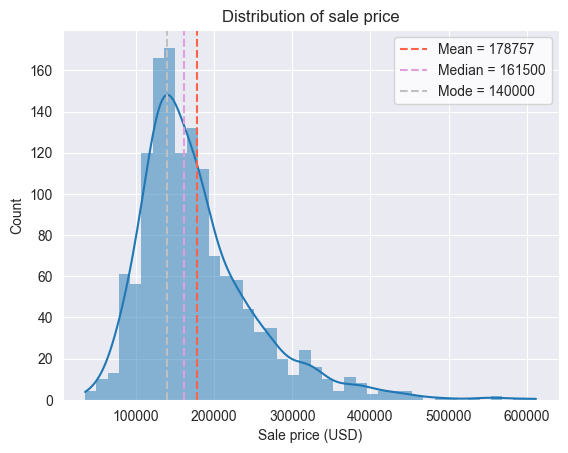

In [12]:
# Sales price distribution

# Print descriptive statistics
print('Descriptive statistics for sale price:')
display(df_tr['SalePrice'].describe())

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create the histogram wit KDE (Kernel Density Estimate)
sns.histplot(df_tr['SalePrice'], kde = True, edgecolor = 'None')

# Calculate mean, median, and mode of SalePrice
mean_price = df_tr['SalePrice'].mean()
median_price = df_tr['SalePrice'].median()
mode_price = statistics.mode(df_tr['SalePrice'])

# Add vertical lines for mean, median, and mode
plt.axvline(mean_price, color = 'tomato', linestyle = '--', label = f'Mean = {mean_price:.0f}')
plt.axvline(median_price, color = 'plum', linestyle = '--', label = f'Median = {median_price:.0f}')
plt.axvline(mode_price, color = 'silver', linestyle = '--', label = f'Mode = {mode_price:.0f}')

# Set the titles and labels
plt.title('Distribution of sale price')
plt.xlabel('Sale price (USD)')

# Add legend
plt.legend(facecolor = 'white')

# Display the plot
plt.show()

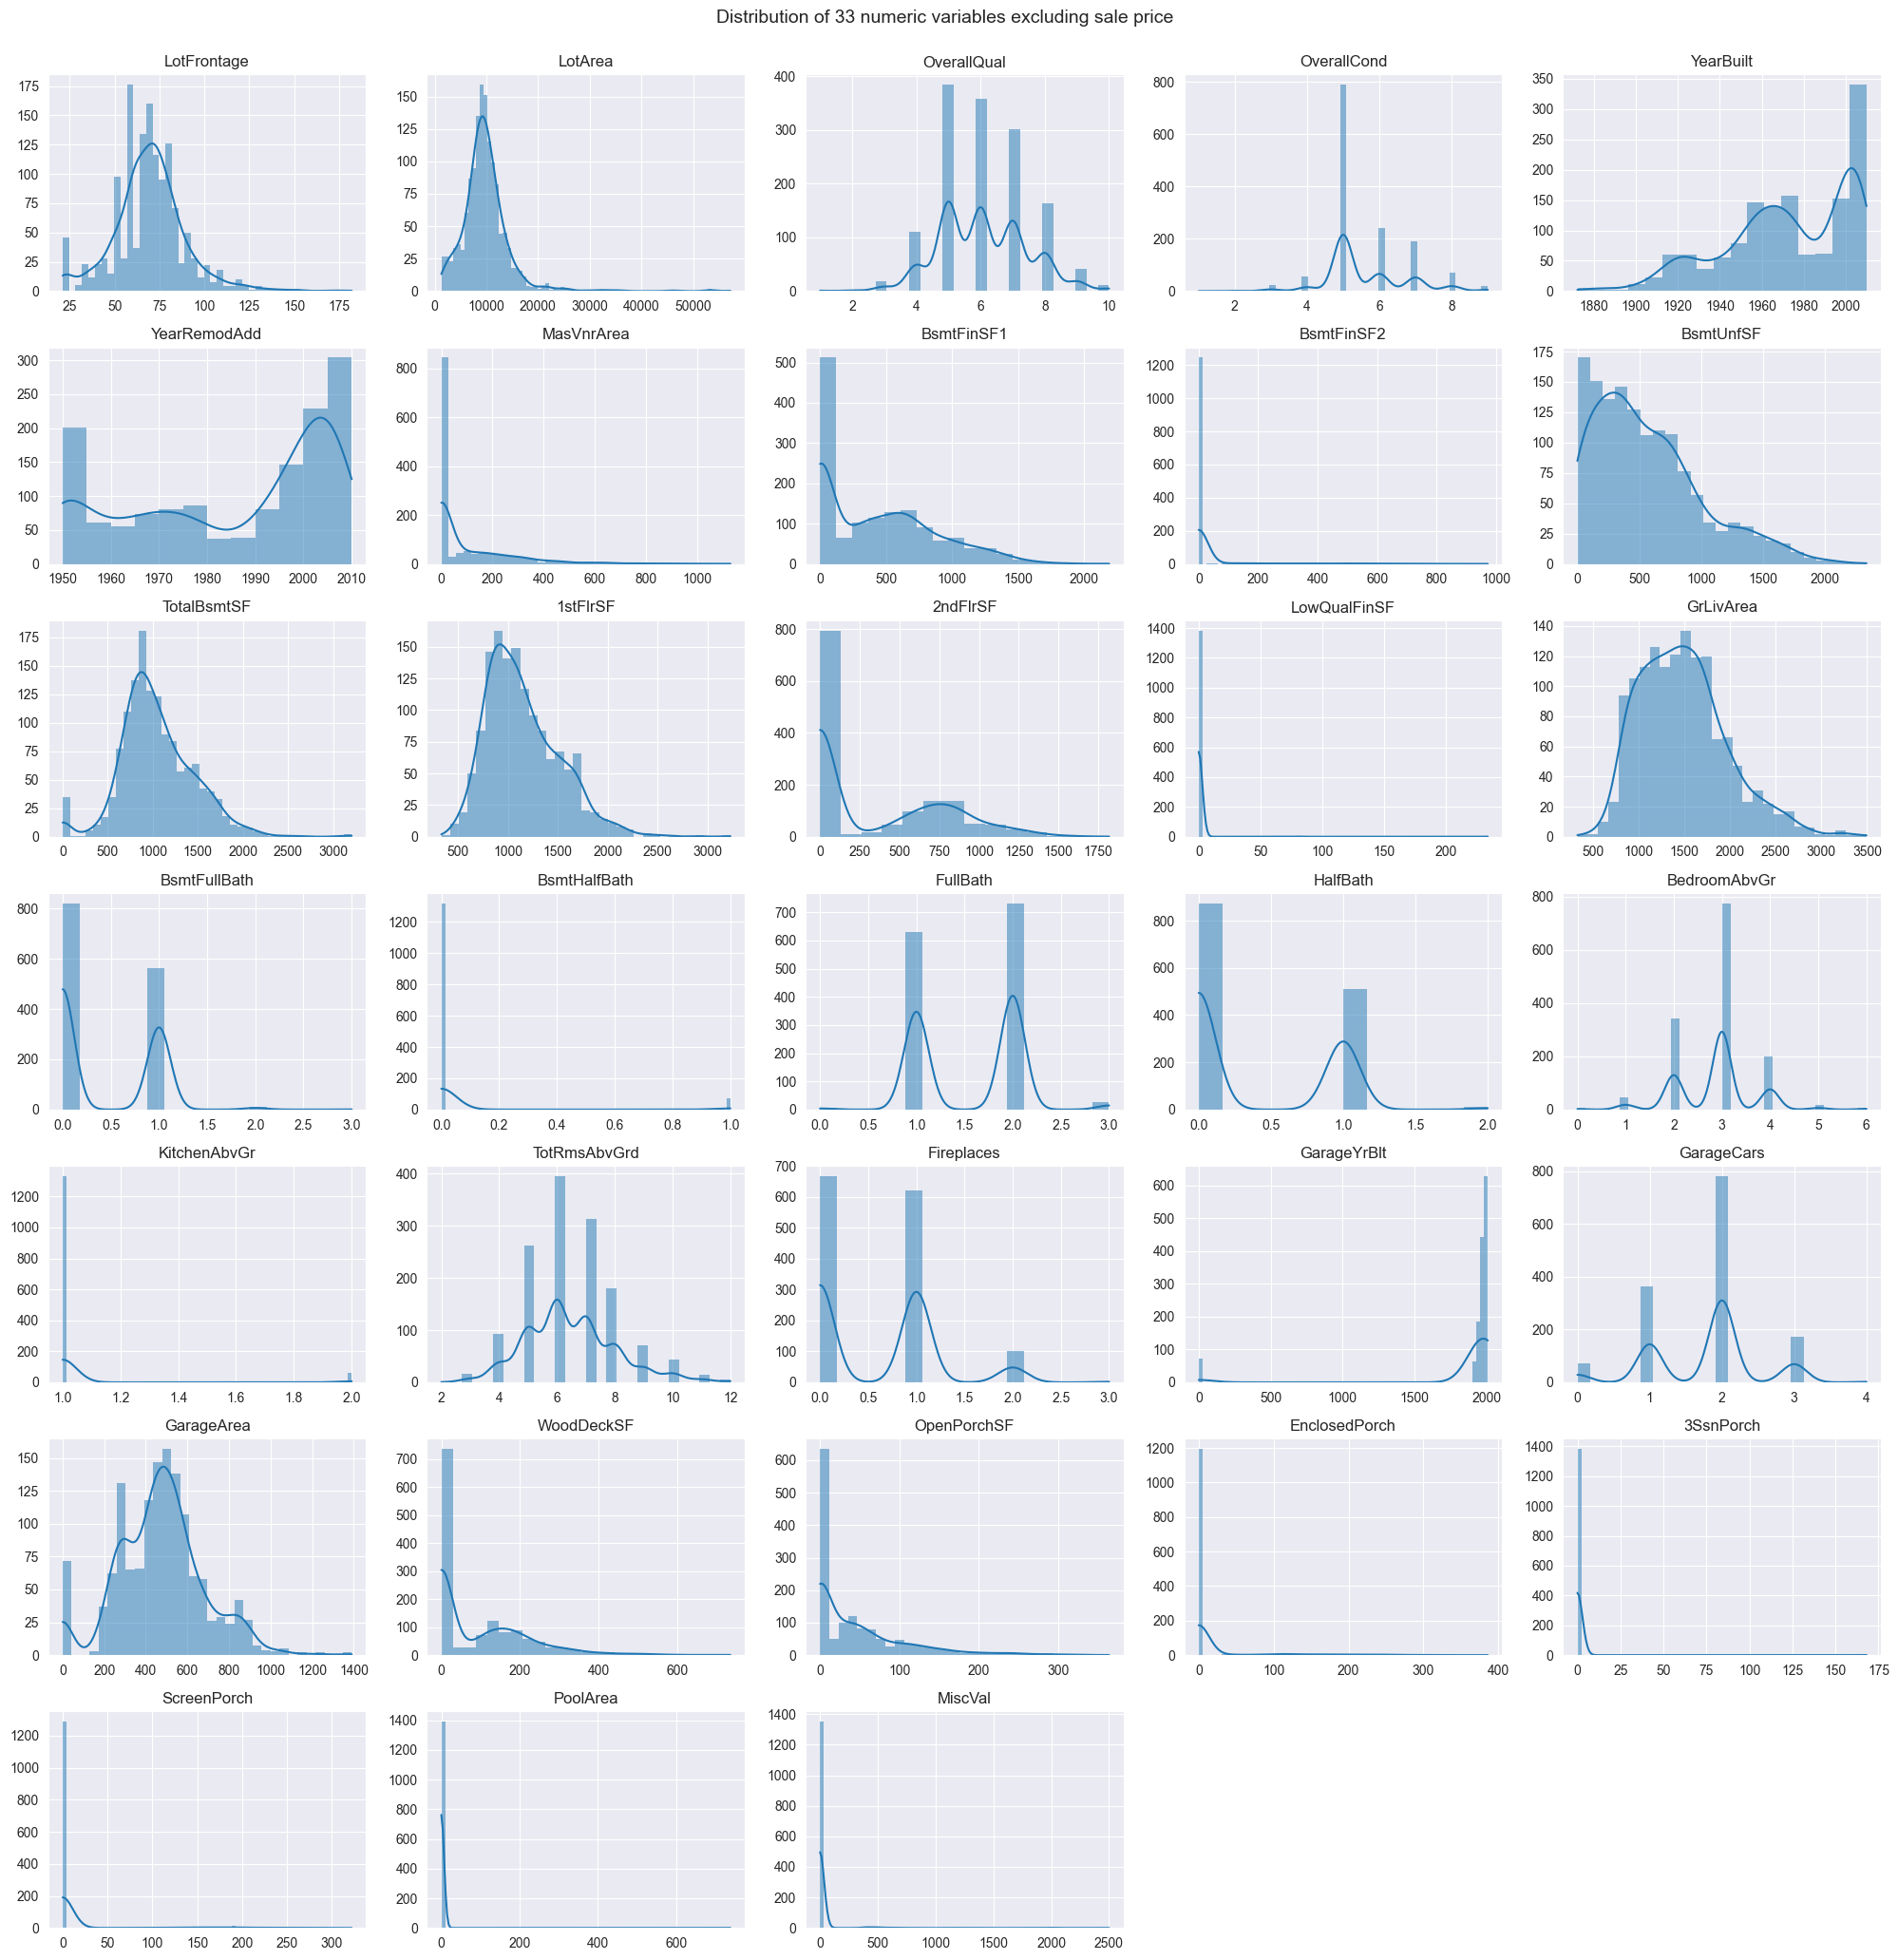

In [13]:
# Distribution of 33 numeric variables excluding sale price
df_num = df_tr.select_dtypes(include = ['float64', 'int64']).drop(columns = 'SalePrice')

# Determine number of rows and columns for subplots
ncols = 5  # Number of columns in the subplot grid
nrows = (len(df_num.columns) + ncols - 1) // ncols  # Compute the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize = (ncols * 4, nrows * 3))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms with density for numeric variables
for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column], kde = True, ax = axes[i], edgecolor = 'None')
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Change x-axis label to empty string
    axes[i].set_ylabel('')  # Change y-axis label to empty string

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the title for the entire figure
plt.suptitle(f'Distribution of {len(df_num.columns)} numeric variables excluding sale price', fontsize = 14)

# Adjust layout to fit suptitle
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Display the plot
plt.show()

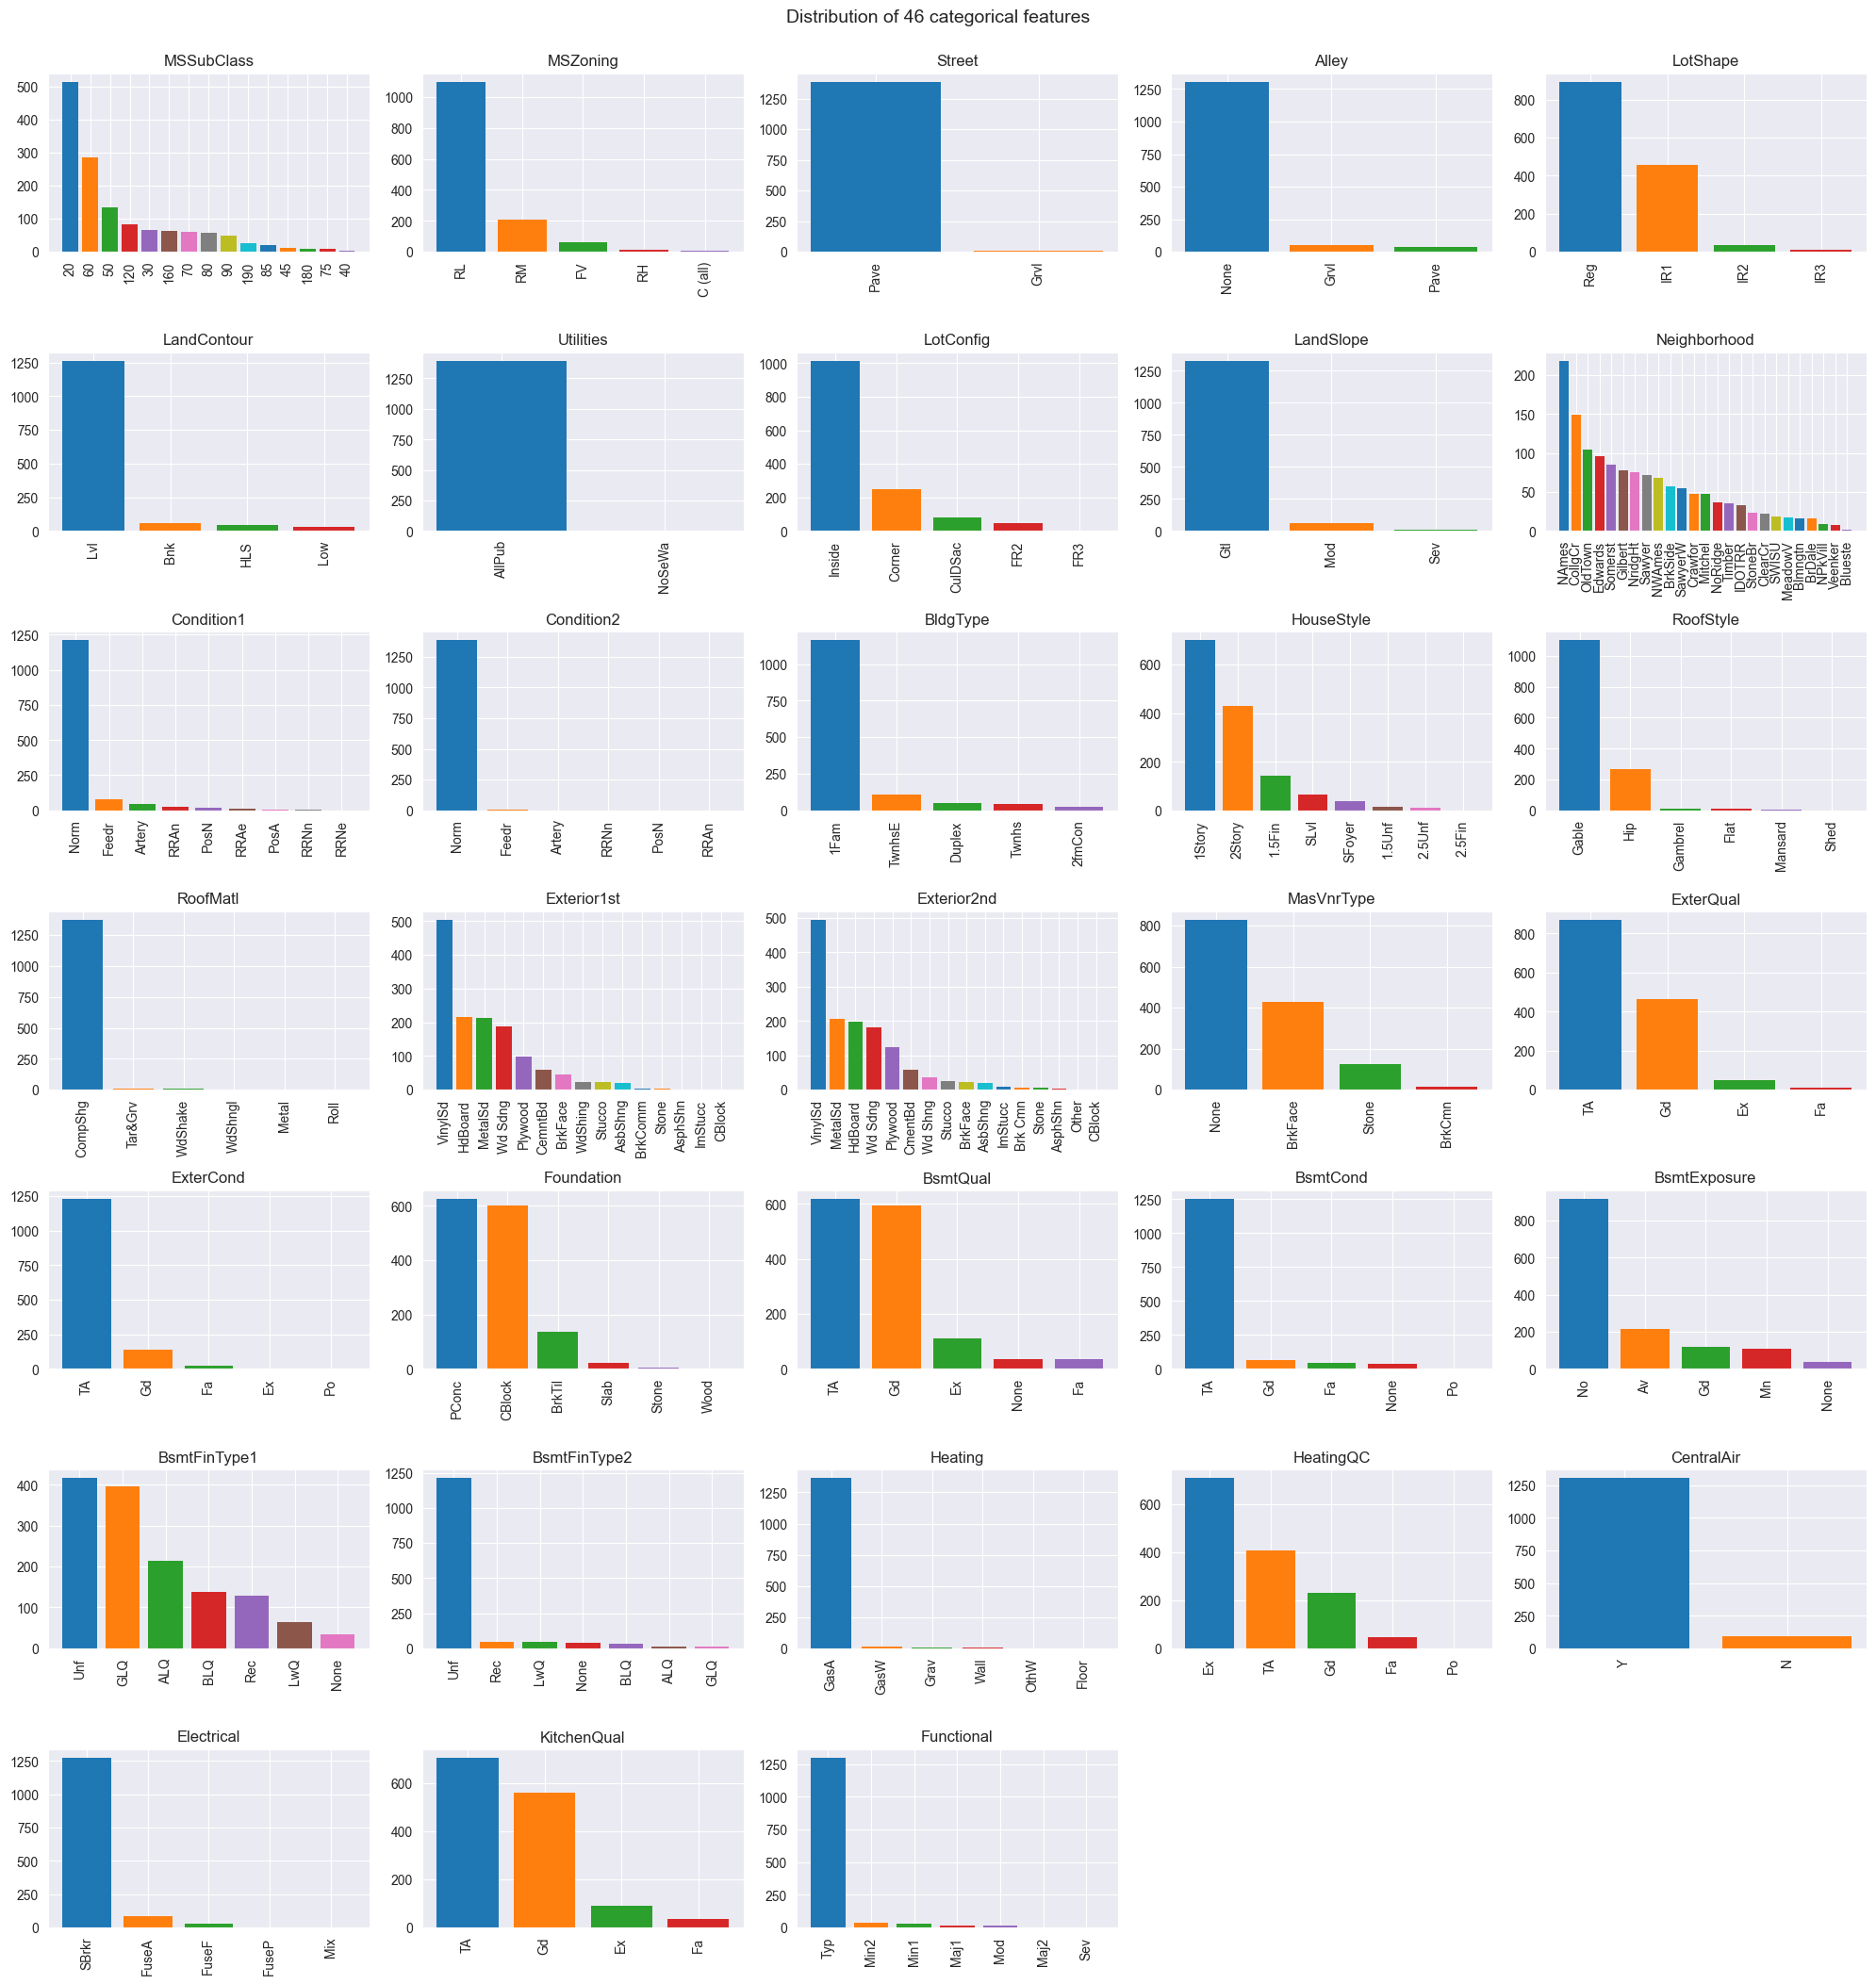

In [14]:
# Distribution of 46 categorical features
df_cat = df_tr.select_dtypes(include=['object'])

# Determine number of rows and columns for subplots
ncols = 5  # Number of columns in the subplot grid
nrows = (len(df_cat.columns) + ncols - 1) // ncols  # Compute the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize = (ncols * 4, nrows * 3))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define a color palette
palette = sns.color_palette() # Get the default color palette

# Plot each categorical variable
for i, column in enumerate(df_cat.columns):
    counts = df_cat[column].value_counts()
    # Create a color map based on the number of unique categories
    color_map = palette[:len(counts)]
    axes[i].bar(counts.index, counts.values, color = color_map, edgecolor = 'None')
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation = 90)
 
# Hide any unused subplots
for j in range(len(df_num.columns), len(axes)):
    fig.delaxes(axes[j])

# Set the title for the entire figure
plt.suptitle(f'Distribution of {len(df_cat.columns)} categorical features', fontsize = 14)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit suptitle

# Display the plot
plt.show()

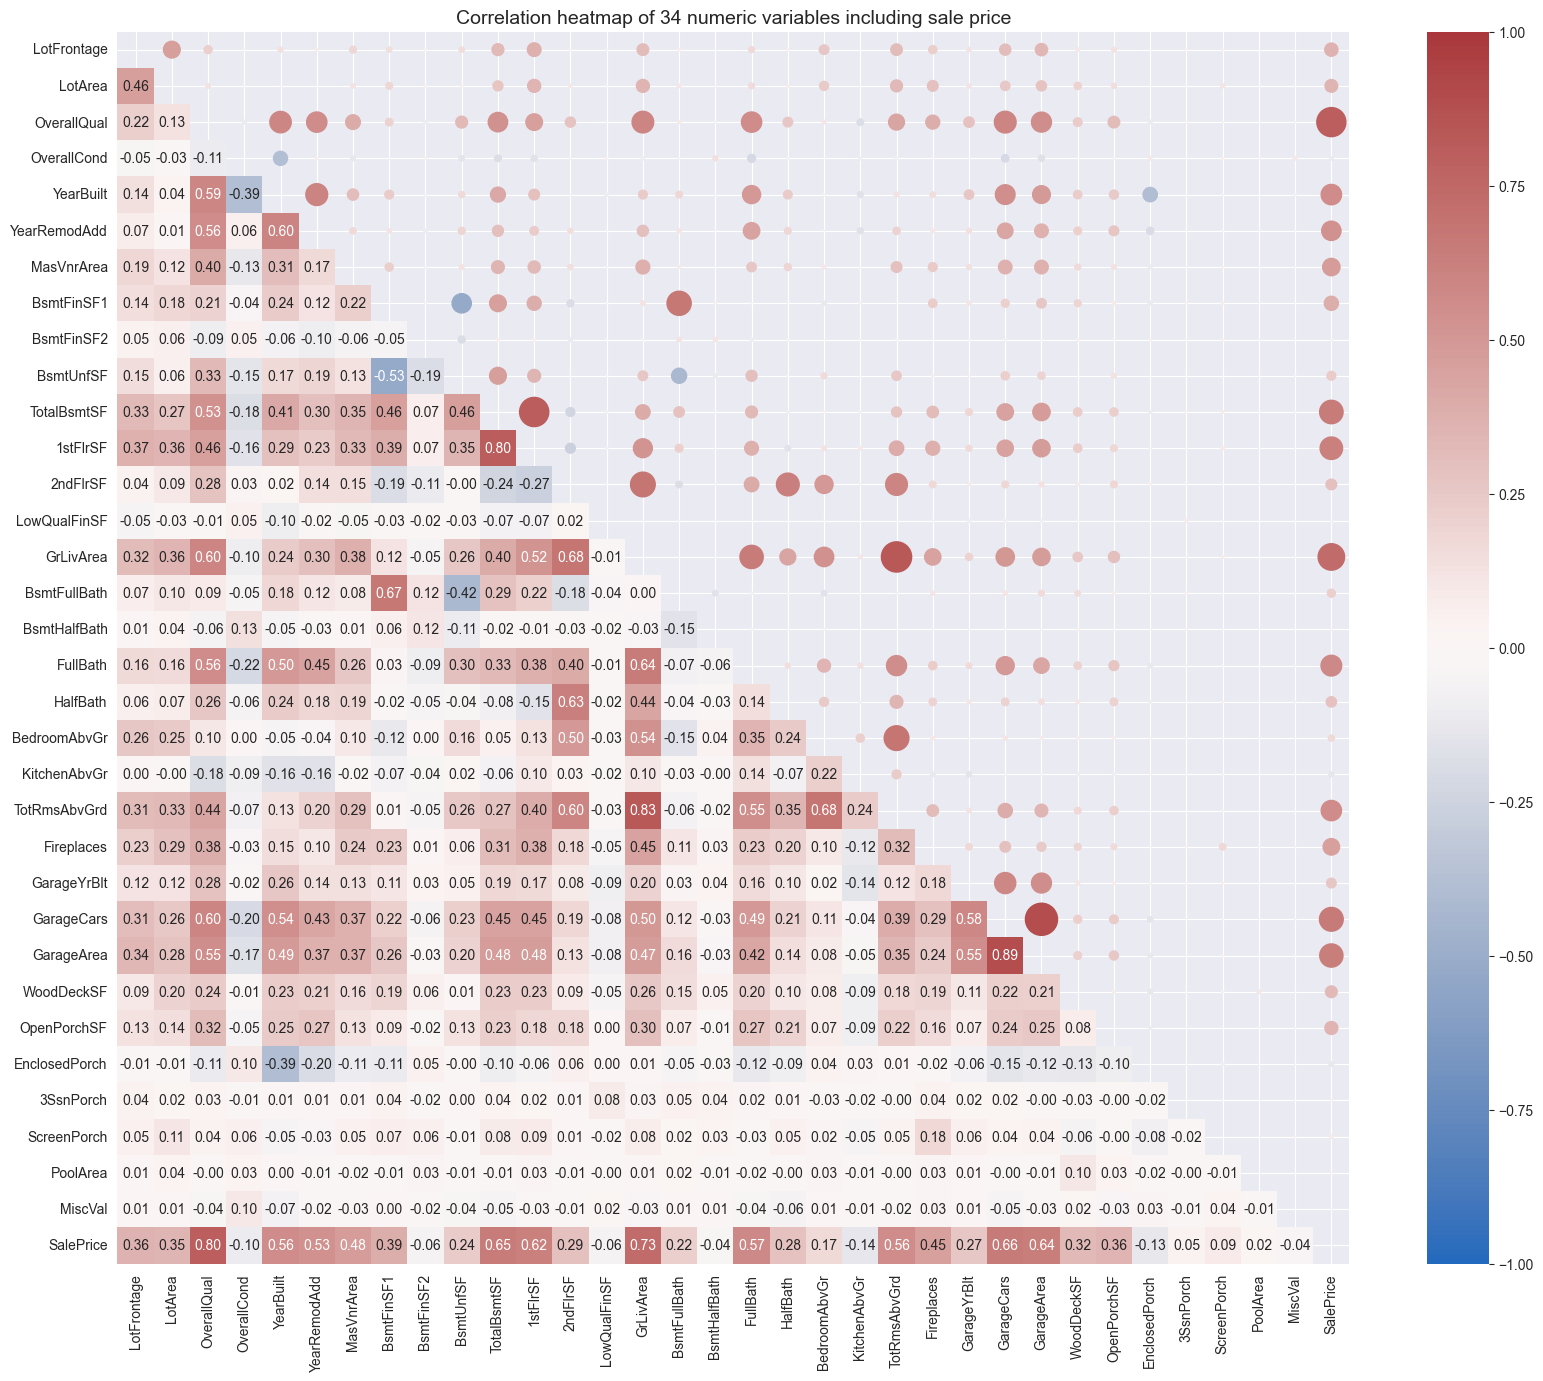

In [15]:
# Check correlations between variables

# Identify and exclude non-numeric columns
numeric_columns = df_tr.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations using numeric columns only
correlation_df = df_tr[numeric_columns].corr()

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_df, dtype = bool))

# Plot the correlation heatmap for the lower triangle
plt.figure(figsize = (20, 16))
sns.heatmap(data=correlation_df, mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag', fmt = '.2f')

# Get the colormap and normalisation
cmap = plt.get_cmap('vlag')
norm = plt.Normalize(-1, 1)  # Normalise based on the correlation range

# Overlay circles on the upper triangle
for i in range(len(correlation_df.columns)):
    for j in range(i + 1, len(correlation_df.columns)):
        # Get the correlation value
        corr_val = correlation_df.iloc[i, j]
        # Define the circle's radius based on the correlation value
        radius = abs(corr_val) * 0.5  # Adjust multiplier for better scaling
        # Get the color from the colormap
        color = cmap(norm(corr_val))  # Get RGBA color
        # Calculate circle position
        x, y = j + 0.5, i + 0.5
        # Plot circle
        plt.gca().add_patch(plt.Circle((x, y), radius, color = color))

# Ensure aspect ratio is equal to make circles appear round
plt.gca().set_aspect('equal', 'box')

# Set the title
plt.title(f'Correlation heatmap of {len(numeric_columns)} numeric variables including sale price', fontsize = 14)

# Display the plot
plt.show()

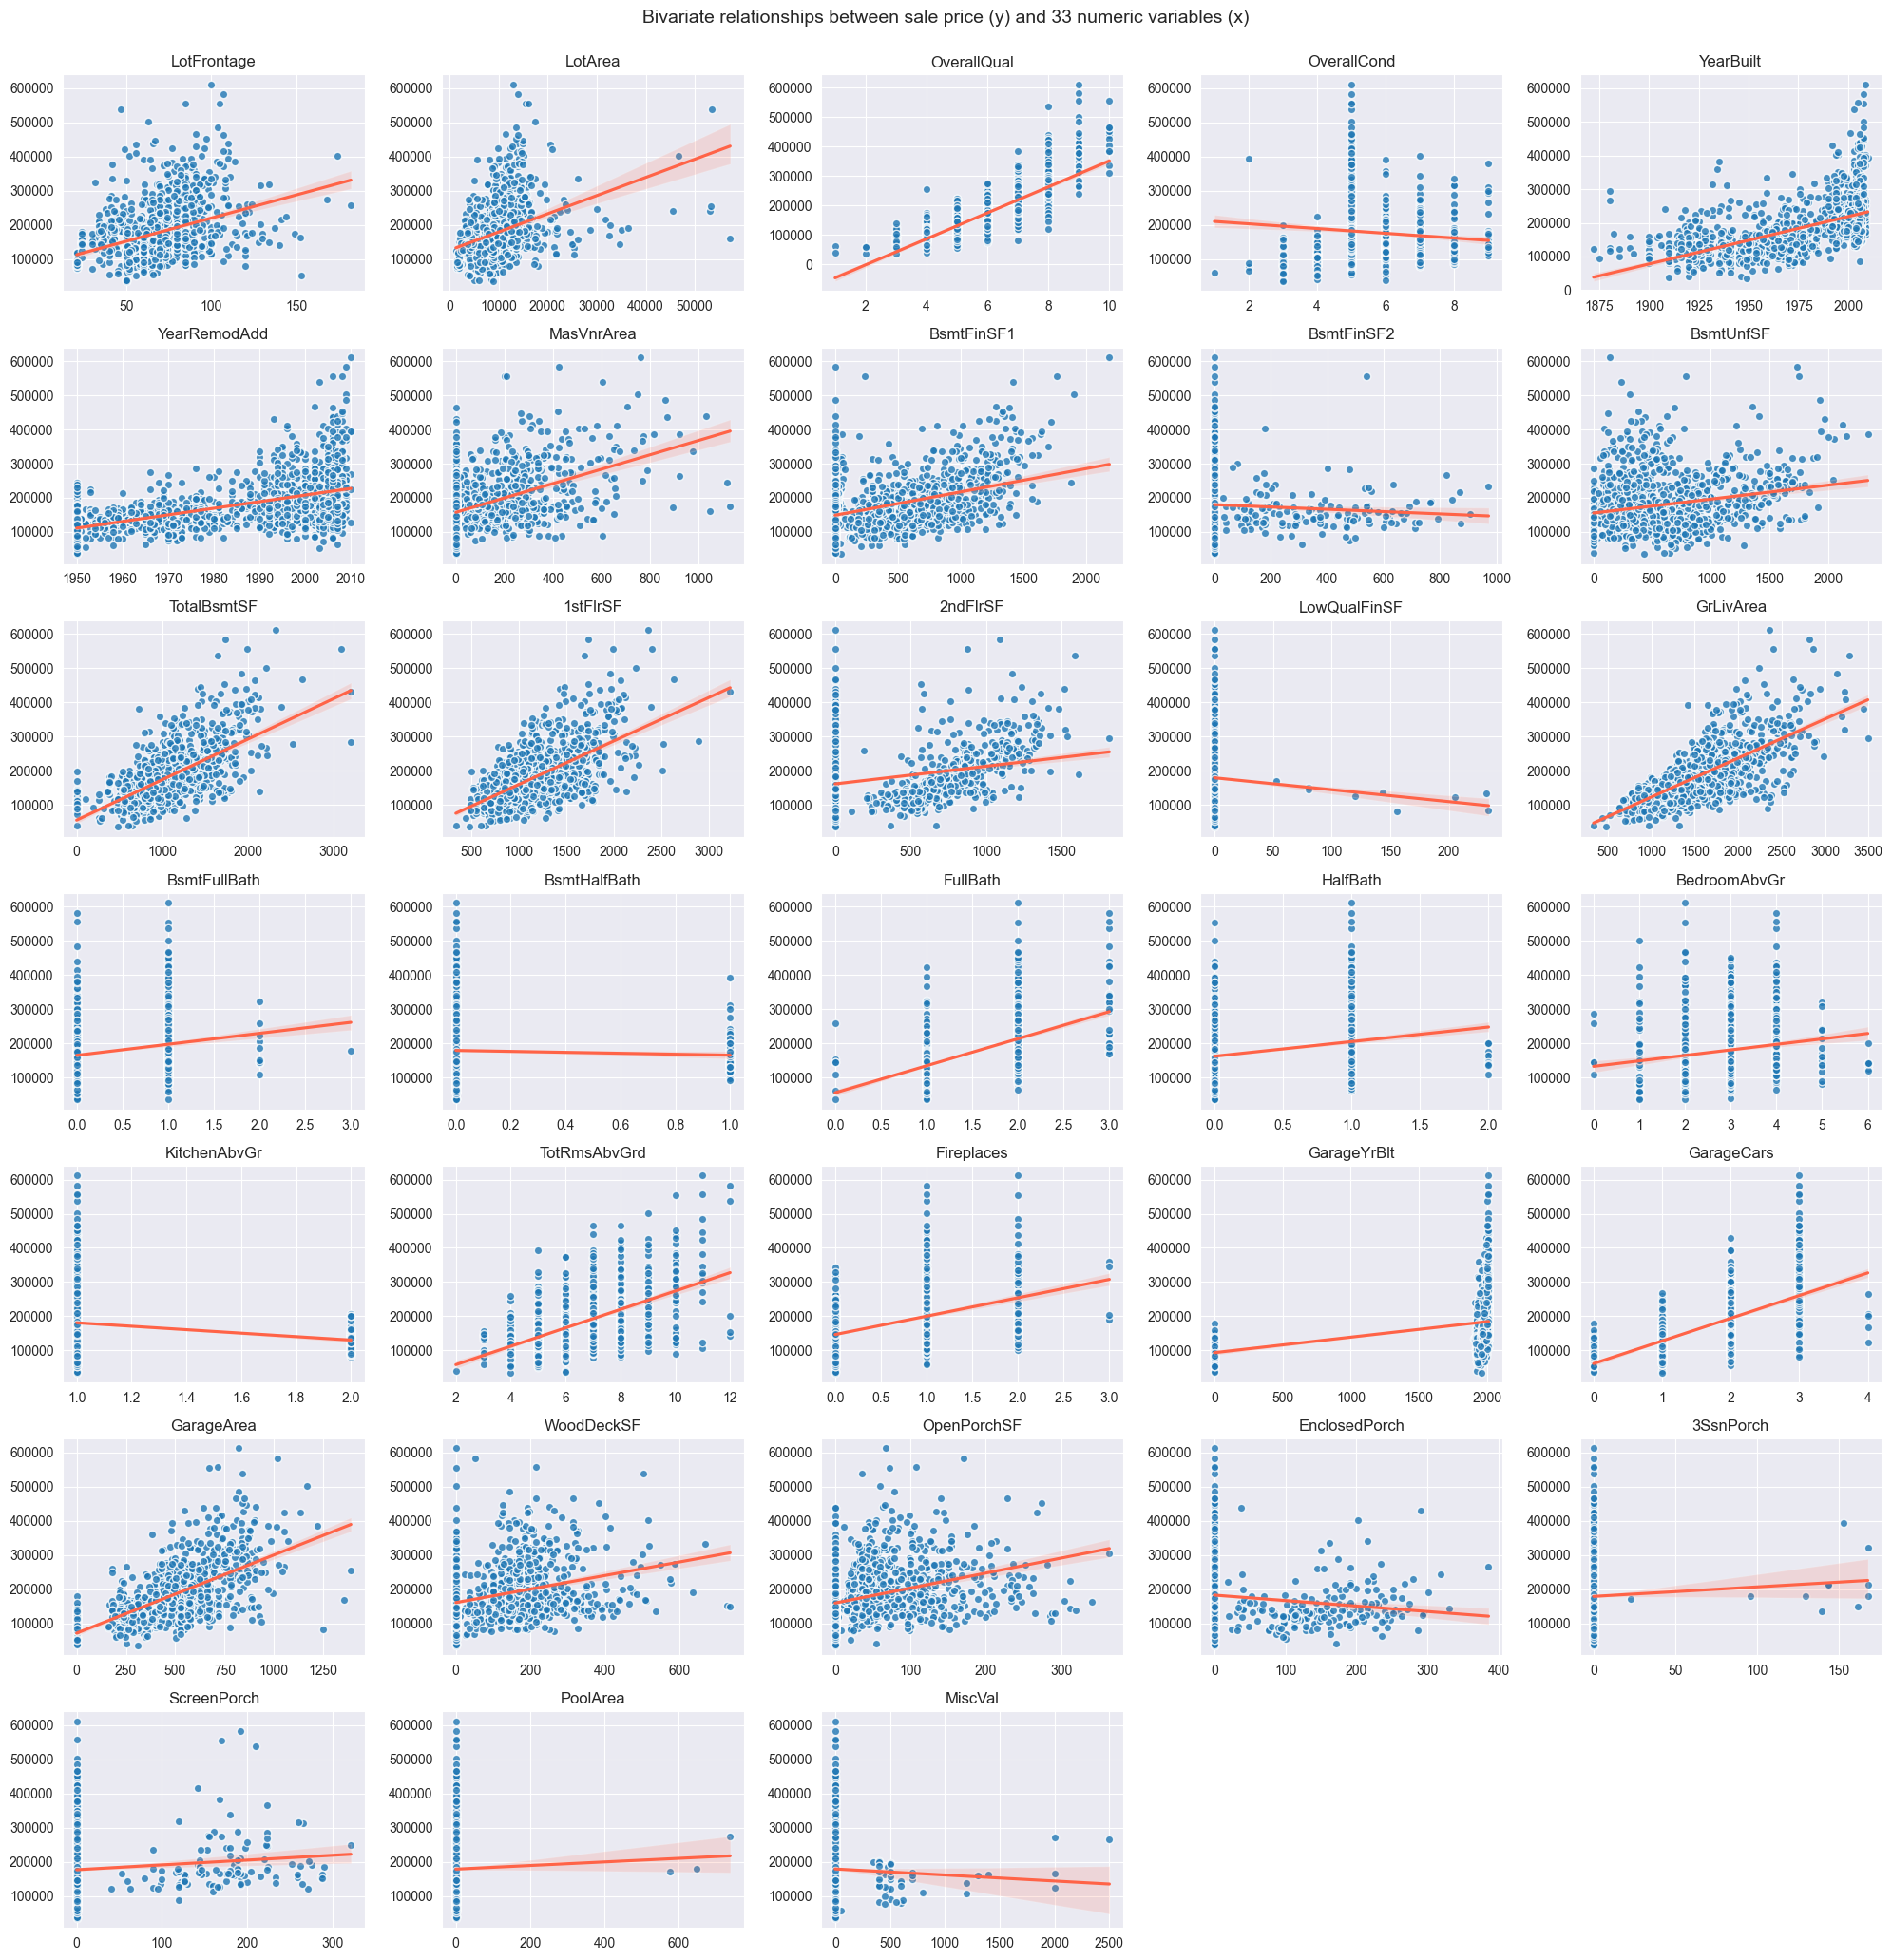

In [16]:
# Examine bivariate relationships with sale price

'''
- Due to constraints in the data, we cannot use an order of 2 or 3 to fit quadratic or cubic regression lines.
- As can be seen, some variables have a clear linear relationship with sale price, while others do not.
- For example, GrLivArea has a strong relationship with sale price, while MiscVal does not.
'''

# Identify and exclude non-numeric columns
df_num = df_tr.select_dtypes(include = ['float64', 'int64']).drop(columns = 'SalePrice')

# Define the number of columns and rows for the subplot grid
ncols = 5  # Number of columns in the subplot grid
nrows = (len(df_num.columns) + ncols - 1) // ncols  # Compute the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize = (ncols * 4, nrows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over numeric columns and create scatter plots with regression lines
for index in range(len(df_num.columns)):
    sns.regplot(x = df_num.columns[index], y = df_tr['SalePrice'], data = df_tr.dropna(), ax = axes[index],
                scatter_kws={'edgecolor': 'white'}, line_kws={'color':'tomato'}, order = 1)
    axes[index].set_title(df_num.columns[index])
    axes[index].set_xlabel('')  # Change x-axis label to empty string
    axes[index].set_ylabel('')  # Change y-axis label to empty string

# Hide any unused subplots
for j in range(len(df_num.columns), len(axes)):
    fig.delaxes(axes[j])

# Set the title for the entire figure
plt.suptitle(f'Bivariate relationships between sale price (y) and {len(df_num.columns)} numeric variables (x)', fontsize = 14)

# Adjust layout to fit the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Display the plot
plt.show()

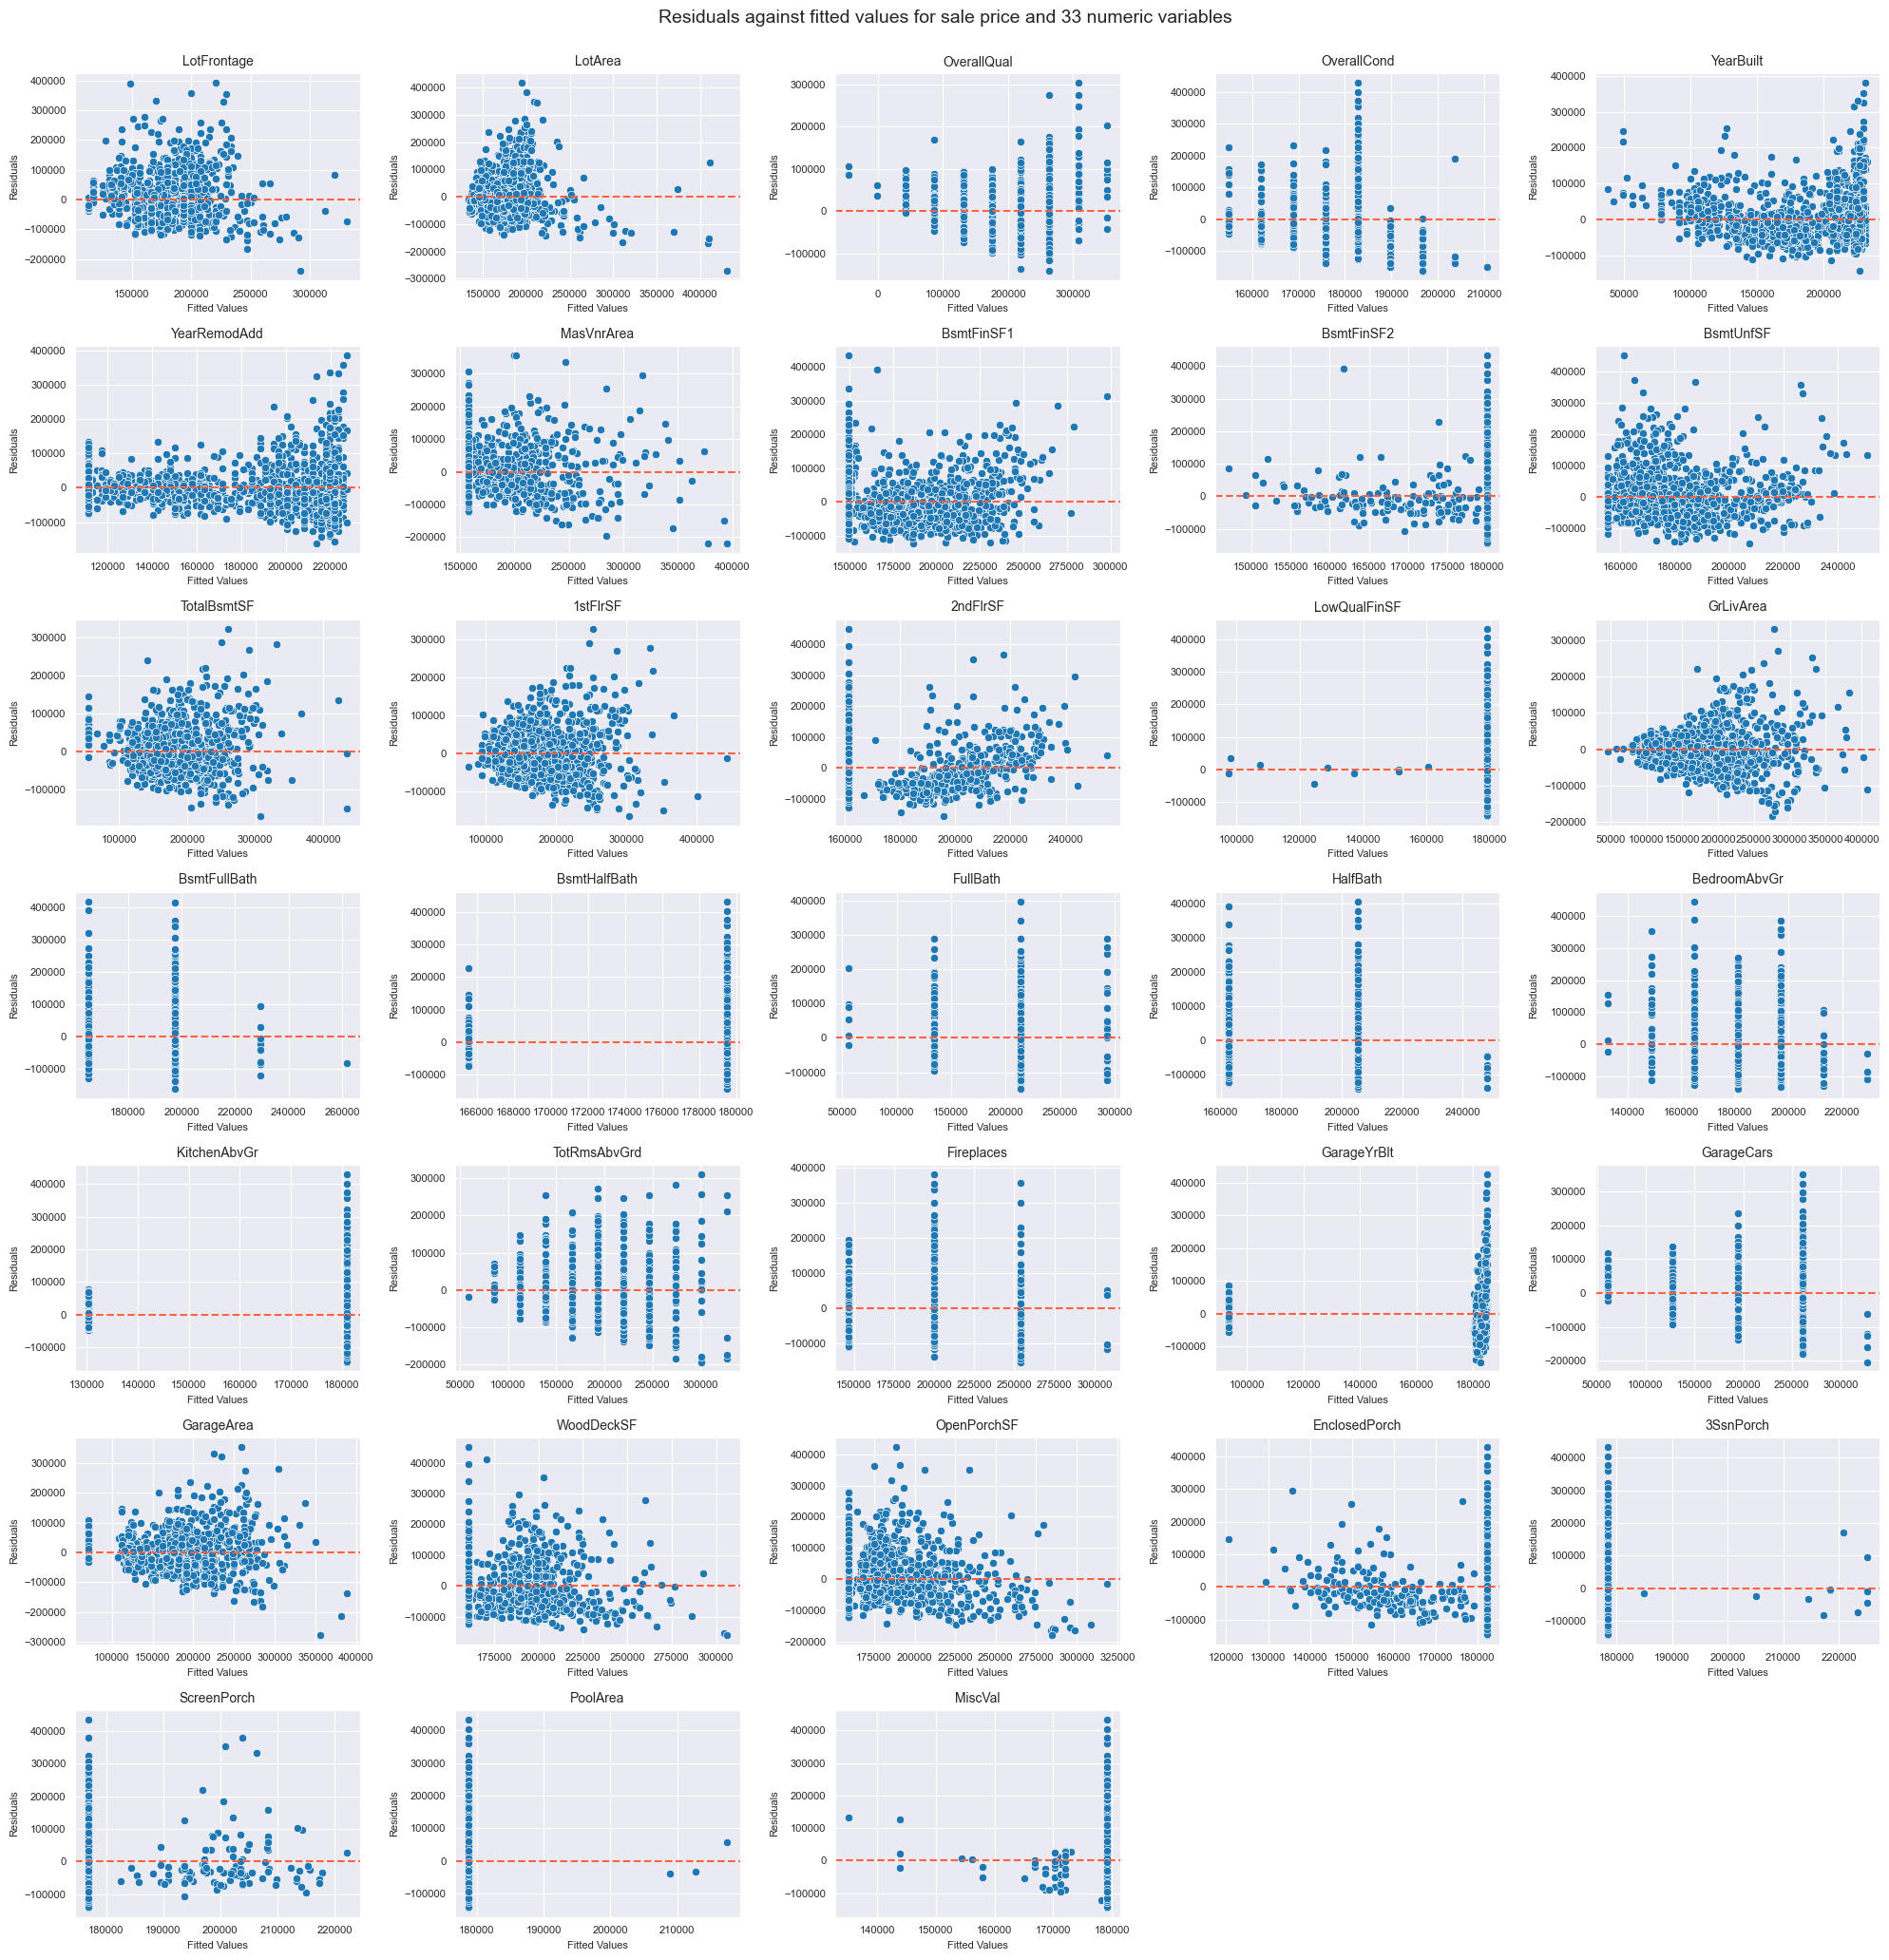

In [17]:
# Check homoscedasticity of residuals against fitted values for sale price and numeric variables

'''
How to interpret homoscedasticity:
- Homoscedasticity refers to the assumption that the residuals are constant across all levels of the independent variables.
- This code snippet fits a linear regression model to the data and plots the residuals against the fitted values.
- The residuals should be randomly distributed around the zero residual line, indicating that the model is capturing the underlying patterns in the data.
- If the residuals show a clear pattern or trend, it suggests data transformation or different models may be needed.
'''

# Identify and exclude non-numeric columns
df_num = df_tr.select_dtypes(include=['float64', 'int64']).drop(columns='SalePrice')

# Define the number of columns and rows for the subplot grid
ncols = 5  # Number of columns in the subplot grid
nrows = (len(df_num.columns) + ncols - 1) // ncols  # Compute the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over numeric columns and create residual vs. fitted value plots
for index, column in enumerate(df_num.columns):
    X = df_tr[[column]]  # Independent variable
    y = df_tr['SalePrice']  # Dependent variable
    
    # Add constant to the independent variable (intercept)
    X = sm.add_constant(X)
    
    # Fit the model
    model = sm.OLS(y, X).fit()

    # Get the fitted values and residuals
    fitted_values = model.fittedvalues
    residuals = model.resid

    # Plot residuals vs fitted values
    sns.scatterplot(x = fitted_values, y = residuals, ax = axes[index])
    axes[index].axhline(0, color = 'tomato', linestyle = '--')  # Zero residual line
    axes[index].set_title(column, fontsize = 10)
    axes[index].set_xlabel('Fitted Values', fontsize = 8)
    axes[index].set_ylabel('Residuals', fontsize = 8)
    axes[index].tick_params(axis='both', which='major', labelsize = 8)  # Smaller font size for tick labels

# Hide any unused subplots
for ax in axes[len(df_num.columns):]:
    ax.set_visible(False)

# Set the title for the entire figure
plt.suptitle(f'Residuals against fitted values for sale price and {len(df_num.columns)} numeric variables', fontsize = 14)

# Adjust layout to fit the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Display the plot
plt.show()

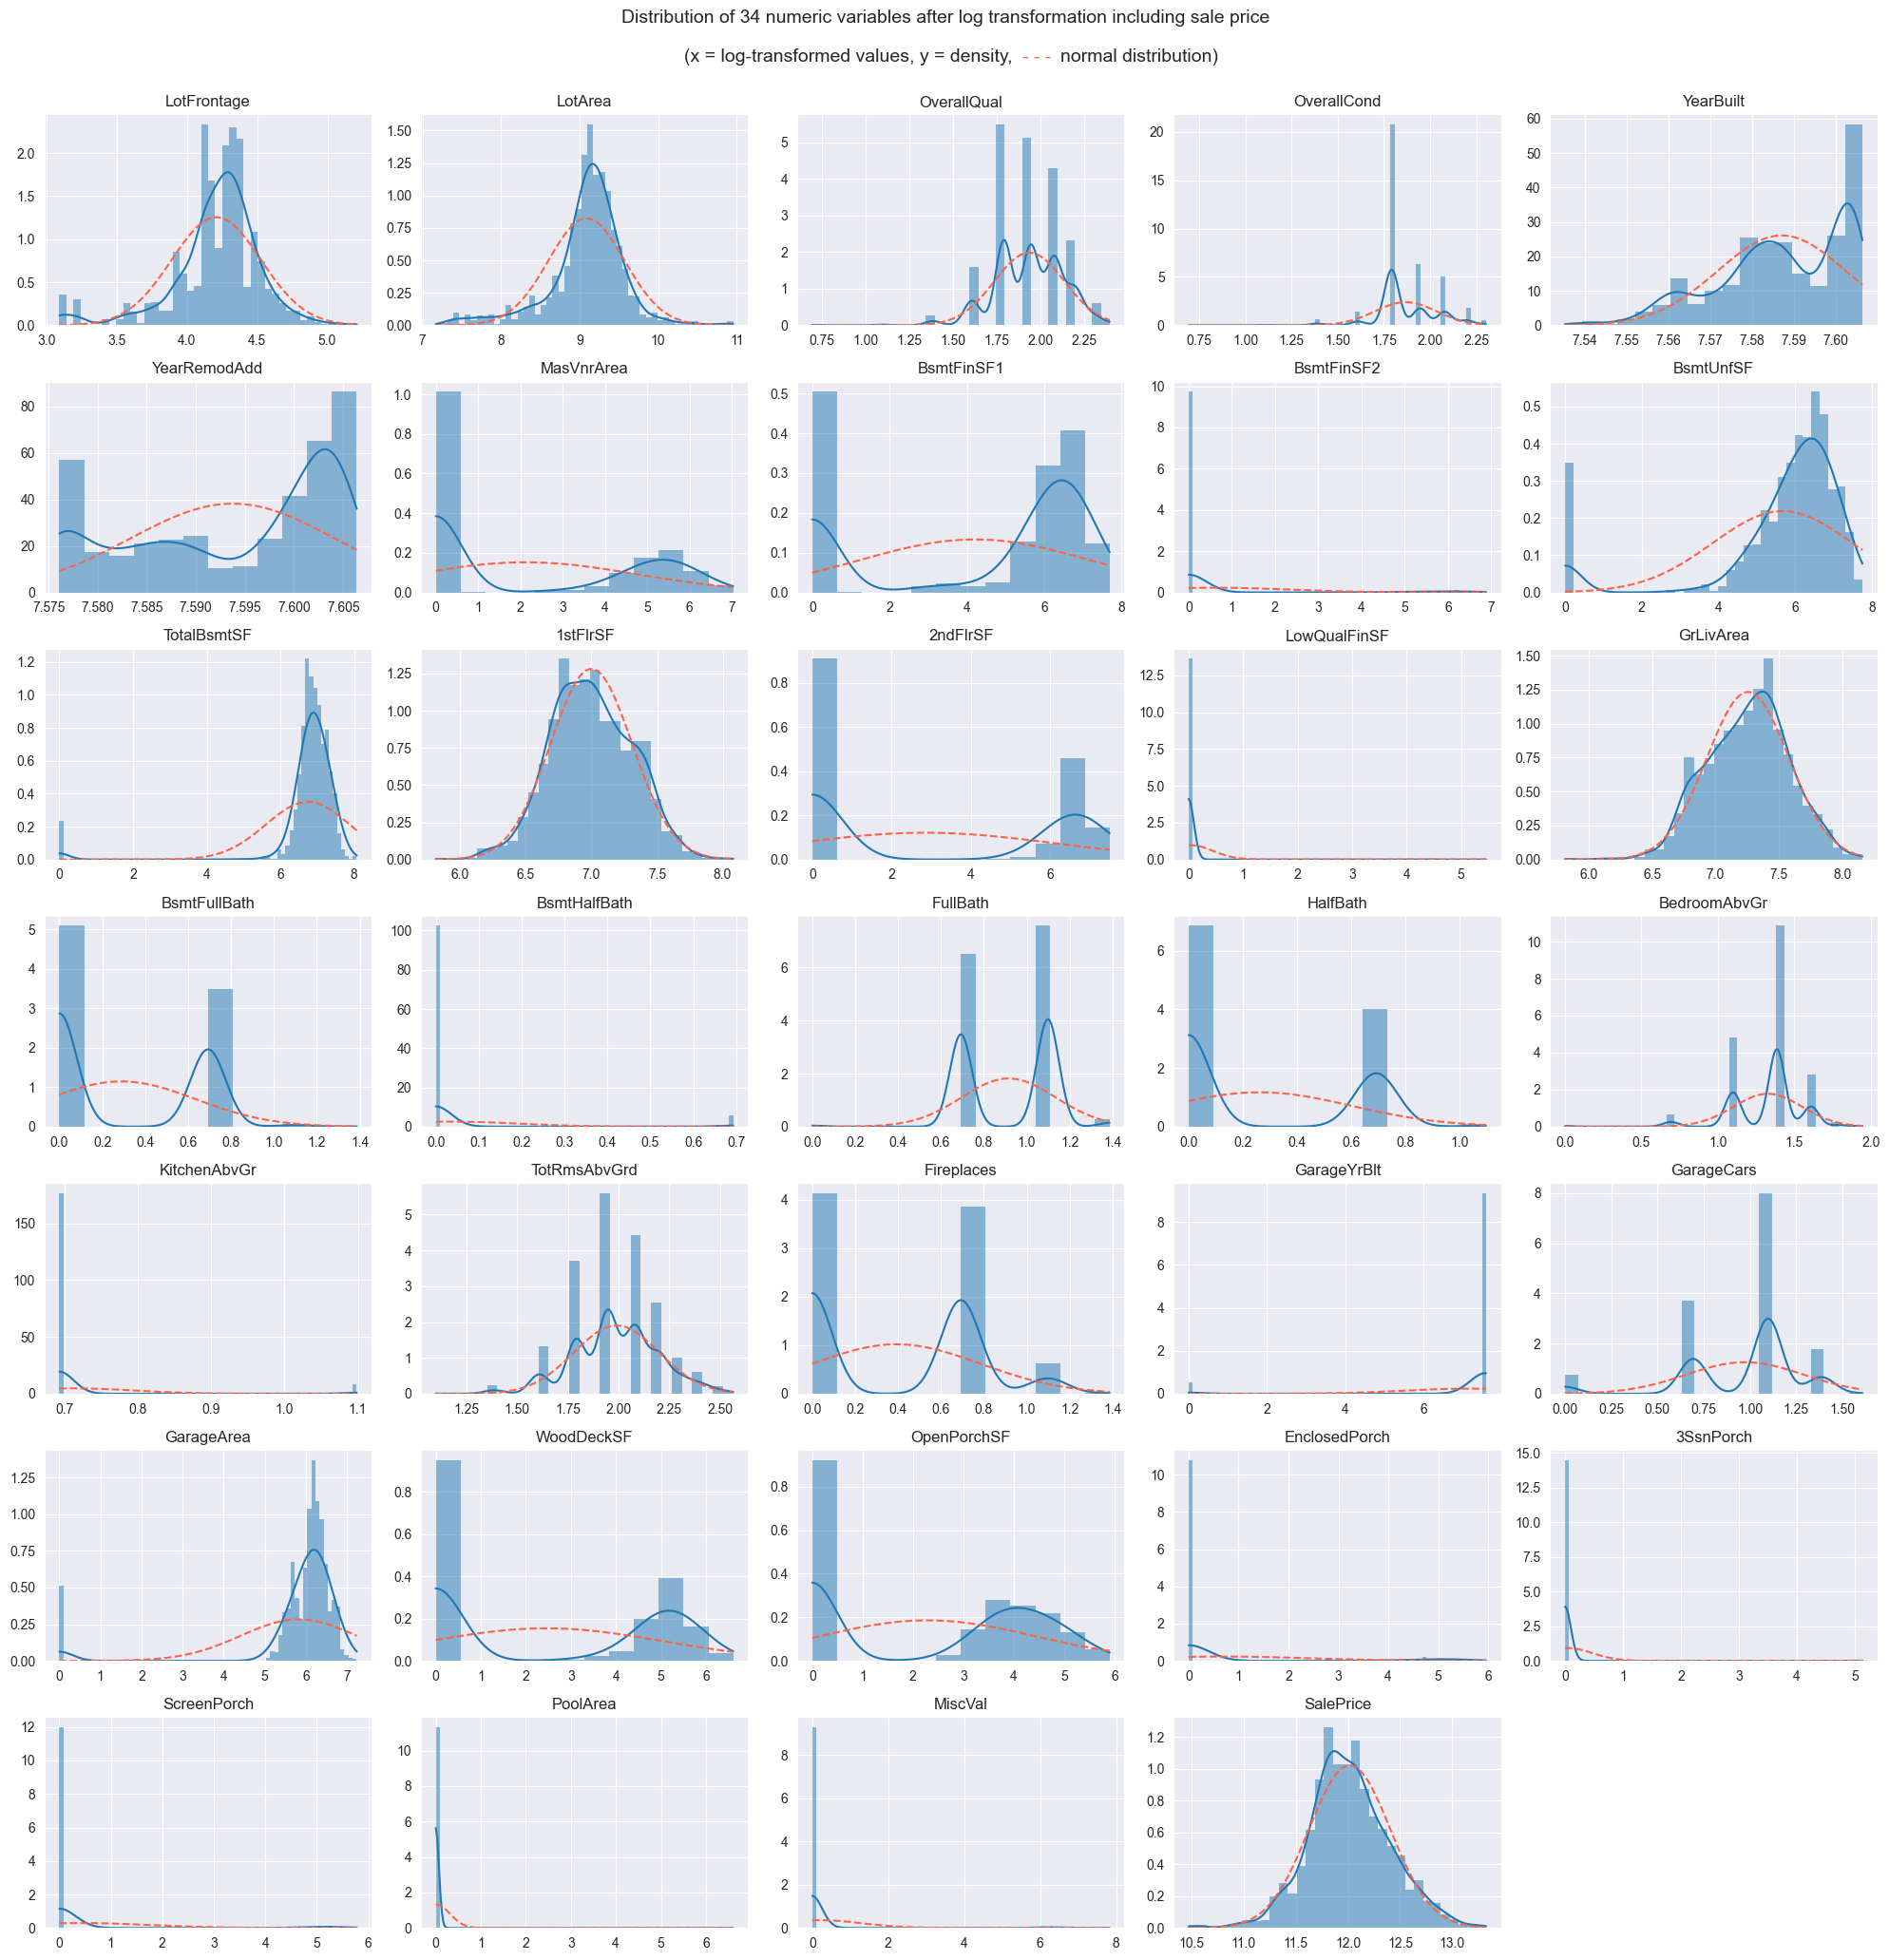

In [18]:
# Normalise data with log transformation to reduce skewness

'''
Why do we need to normalise the data?
The target variable is right-skewed, which can cause issues for some machine learning algorithms.
Normalising the target variable can help to improve the performance of the model.

Why use the log transformation method?
The log transformation method is commonly used to normalise right-skewed data.
It reduces the skewness of the data and makes it more normally distributed.

Reverse the log1p transformation using expm1:
df_log_tr[numeric_columns] = df_log_tr[numeric_columns].apply(np.expm1)
df_log_te[numeric_columns] = df_log_te[numeric_columns].apply(np.expm1)
'''

# Copy the original DataFrames
df_log_tr = df_tr.copy()
df_log_te = df_te.copy()

# Identify numeric columns
numeric_columns_tr = df_log_tr.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_te = df_log_te.select_dtypes(include=['float64', 'int64']).columns

# Apply log1p transformation
df_log_tr[numeric_columns_tr] = df_log_tr[numeric_columns_tr].apply(np.log1p)
df_log_te[numeric_columns_te] = df_log_te[numeric_columns_te].apply(np.log1p)

# Determine subplot layout
ncols = 5
nrows = (len(numeric_columns_tr) + ncols - 1) // ncols

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize = (ncols * 4, nrows * 3))
axes = axes.flatten()

# Plot histograms with normal distribution lines
for i, column in enumerate(numeric_columns_tr):
    ax = axes[i]
    sns.histplot(df_log_tr[column], kde = True, ax = ax, edgecolor = 'None', stat = 'density')
    
    # Calculate normal distribution parameters
    mean = df_log_tr[column].mean()
    std = df_log_tr[column].std()
    x = np.linspace(df_log_tr[column].min(), df_log_tr[column].max(), 100)
    pdf = stats.norm.pdf(x, mean, std)
    
    # Plot normal distribution line
    ax.plot(x, pdf, 'tomato', linestyle = '--')
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the title for the entire figure
plt.suptitle(f'Distribution of {len(numeric_columns_tr)} numeric variables after log transformation including sale price', fontsize = 14)

# Add the text below the title
plt.figtext(0.450, 0.956, '(x = log-transformed values, y = density, ', ha = 'center', va = 'center', fontsize = 14)
plt.figtext(0.548, 0.956, '- - -', ha = 'center', va = 'center', color = 'tomato', fontsize = 14)
plt.figtext(0.602, 0.956, 'normal distribution)', ha = 'center', va = 'center', fontsize = 14)

# Adjust layout to fit the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()

In [19]:
# Encode categorical variables

'''
Machine learning algorithms require numeric input data.
Categorical variables need to be converted into numeric format before they can be used in the model.
It's important to align the encoding of categorical variables in the training and test sets to avoid discrepancies.
'''

# Copy the data frame
df_en_tr = df_log_tr.copy()
df_en_te = df_log_te.copy()

# Dummy encode the department column
df_en_tr = pd.get_dummies(df_en_tr, drop_first = False, dtype = 'int64')
df_en_te = pd.get_dummies(df_en_te, drop_first = False, dtype = 'int64')

# Align the columns of the test set with the training set to avoid discrepancies
df_en_te = df_en_te.reindex(columns = df_en_tr.columns, fill_value = 0)

# Display the new data frame
print('Summary of df_en_tr:')
display(df_en_tr.info())
display(df_en_tr.head())
print('Summary of df_en_te:')
display(df_en_te.info())
display(df_en_te.head())

Summary of df_en_tr:
<class 'pandas.core.frame.DataFrame'>
Index: 1394 entries, 0 to 1459
Columns: 325 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(34), int64(291)
memory usage: 3.5 MB


None

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     4.189655  9.042040     2.079442     1.791759   7.602900      7.602900   
1     4.394449  9.169623     1.945910     2.197225   7.589336      7.589336   
2     4.234107  9.328212     2.079442     1.791759   7.601902      7.602401   
3     4.110874  9.164401     2.079442     1.791759   7.557995      7.586296   
4     4.442651  9.565284     2.197225     1.791759   7.601402      7.601402   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0    5.283204    6.561031         0.0   5.017280  ...               0   
1    0.000000    6.886532         0.0   5.652489  ...               0   
2    5.093750    6.188264         0.0   6.075346  ...               0   
3    0.000000    5.379897         0.0   6.293419  ...               0   
4    5.860786    6.486161         0.0   6.196444  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 325 columns]

Summary of df_en_te:
<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 0 to 1458
Columns: 325 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(33), int64(292)
memory usage: 3.5 MB


None

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     4.394449  9.360741     1.791759     1.945910   7.581720      7.581720   
2     4.317488  9.534668     1.791759     1.791759   7.599902      7.600402   
3     4.369448  9.208238     1.945910     1.945910   7.600402      7.600402   
4     3.784190  8.518392     2.197225     1.791759   7.597396      7.597396   
5     4.330733  9.210440     1.945910     1.791759   7.597898      7.598399   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0    0.000000    6.150603    4.976734   5.602119  ...               0   
2    0.000000    6.674561    0.000000   4.927254  ...               0   
3    3.044522    6.401917    0.000000   5.783825  ...               0   
4    0.000000    5.575949    0.000000   6.925595  ...               0   
5    0.000000    0.000000    0.000000   6.638568  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   
5             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   
5                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
2                     1                      0  
3                     1                      0  
4                     1                      0  
5                     1                      0  

[5 rows x 325 columns]

# Constructing Stage

During the construction stage, we build and test models to address the business problem. Key tasks include constructing models, evaluating model performance, and selecting the best model for the problem.

## Model selection

Given that the target variable is continuous, we will use regression models to predict house prices. We will evaluate the performance of various regression models, including linear regression, Lasso regression, Ridge regression, ElasticNet, random forest, and XGBoost. We will compare the models based on the the mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and r-squared (R²) to select the best model. We will also perform hyperparameter optimisation to improve the model's predictive accuracy.

### Linear regression model

In [20]:
# Define features (X) and target (y) for training set for linear regression
X_train = df_en_tr.drop('SalePrice', axis = 1)
y_train = df_en_tr['SalePrice']

# Construct a linear regression model
linear = LinearRegression()

In [21]:
# Fit linear regression model to training data
linear.fit(X_train, y_train)

LinearRegression()

In [22]:
# Metrics for linear regression

# Predict the label for the training set
y_train_pred = linear.predict(X_train)

# Compute evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

# Create a dictionary for the results
results = {'model': 'linear regression',
           'mae': mae,
           'mse': mse,
           'rmse': rmse,
           'r2': r2
           }

# Convert the dictionary to a DataFrame
linear_results = pd.DataFrame([results])

# Display the results
linear_results

model       mae       mse      rmse        r2
0  linear regression  0.060643  0.007604  0.087202  0.950111

In [23]:
# Check predicted and actual labels for the training set for linear regression

# Print a sample of predicted labels with formatting
predicted_labels = linear.predict(X_train)[:10]
print(*[f'{label:.2f}' for label in predicted_labels], sep=', ')

# Print a sample of actual labels with formatting
actual_labels = y_train[:10]
print(*[f'{label:.2f}' for label in actual_labels], sep=', ')

12.23, 12.17, 12.29, 12.01, 12.58, 12.53, 12.34, 11.70, 11.73, 11.78
12.25, 12.11, 12.32, 11.85, 12.43, 12.63, 12.21, 11.77, 11.68, 11.77


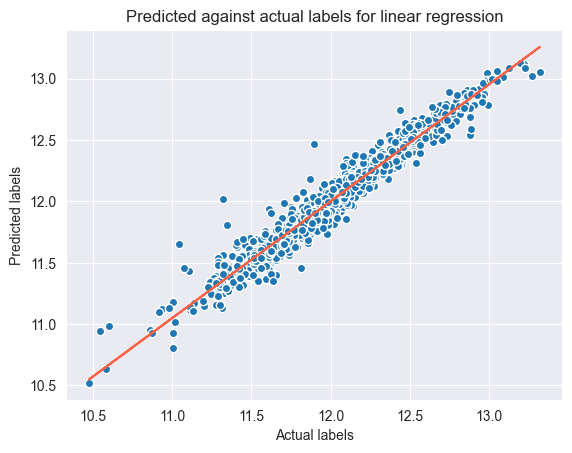

In [24]:
# Visualize the predicted vs actual labels for the training set for linear regression

# Predict the labels
predicted_labels = linear.predict(X_train)

# Scatter plot
plt.scatter(y_train, predicted_labels, edgecolor = 'white')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Predicted against actual labels for linear regression')

# Overlay the regression line
z = np.polyfit(y_train, predicted_labels, 1)    # Fit a 1st-degree polynomial
p = np.poly1d(z)                                # Create a polynomial function from the coefficients
plt.plot(y_train, p(y_train), color = 'tomato') # Plot the line

# Display the plot
plt.show()

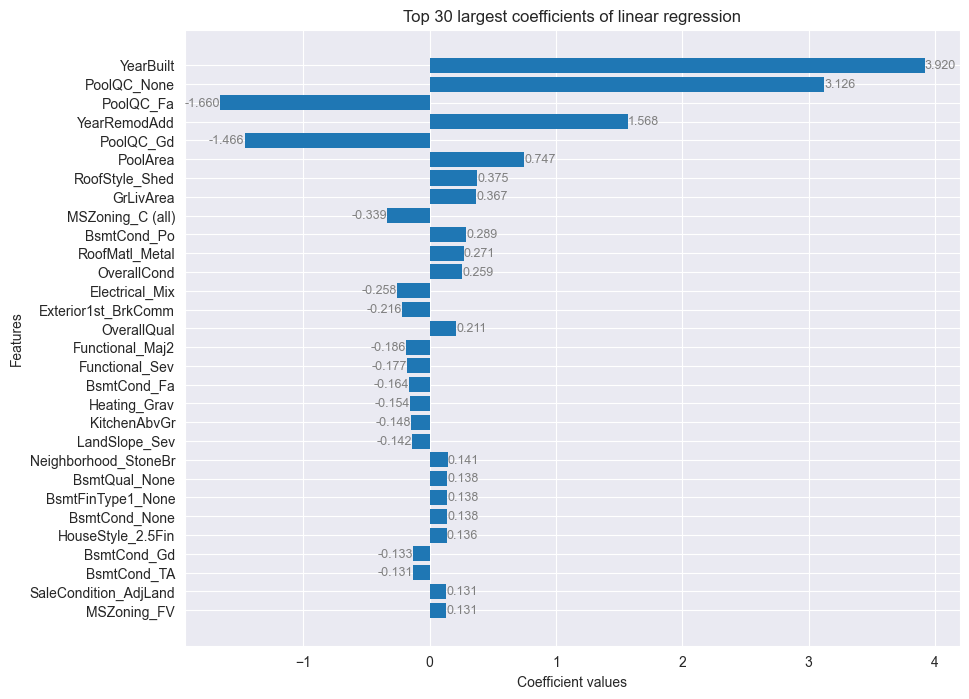

In [25]:
# Coefficients of linear regression

# Get feature names from X_train DataFrame
feature_names = df_en_tr.drop('SalePrice', axis = 1).columns

# Get the coefficients of the linear regression model
coefficients = linear.coef_

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value and select the top 10 largest coefficients
coef_df['Absolute coefficient'] = coef_df['Coefficient'].abs()
top_coef_df = coef_df.nlargest(30, 'Absolute coefficient').reset_index(drop = True)

# Sort the DataFrame by 'Absolute Coefficient' in descending order
top_coef_df = top_coef_df.sort_values(by = 'Absolute coefficient')

# Plot the top largest coefficients
plt.figure(figsize =(10, 8))
bars = plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'], edgecolor = 'None')

# Set the title and labels
plt.xlabel('Coefficient values')
plt.ylabel('Features')
plt.title('Top 30 largest coefficients of linear regression')

# Annotate each bar with its coefficient value
for bar, coef in zip(bars, top_coef_df['Coefficient']):
    if coef != 0:  # Only annotate bars where the coefficient is not zero
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{coef:.3f}', ha = 'left' if coef > 0 else 'right', va = 'center', fontsize = 9, color = 'gray')

# Show the plot
plt.show()

### Lasso regression model: L1 regularisation

In [26]:
# Define features (X) and target (y) for training set for Lasso regression
X_train = df_en_tr.drop('SalePrice', axis = 1)
y_train = df_en_tr['SalePrice']

# Construct a linear regression model
lasso = LassoCV()

In [27]:
# Fit Lasso regression model to training data
lasso.fit(X_train, y_train)

LassoCV()

In [28]:
# Metrics for Lasso regression

# Predict the label for the training set
y_train_pred = lasso.predict(X_train)

# Compute evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

# Create a dictionary for the results
results = {'model': 'lasso regression',
           'mae': mae,
           'mse': mse,
           'rmse': rmse,
           'r2': r2
           }

# Convert the dictionary to a DataFrame
lasso_results = pd.DataFrame([results])

# Display the results
lasso_results

model      mae       mse      rmse        r2
0  lasso regression  0.06985  0.009606  0.098011  0.936975

In [29]:
# Check predicted and actual labels for the training set for Lasso regression

# Print a sample of predicted labels with formatting
predicted_labels = lasso.predict(X_train)[:10]
print(*[f'{label:.2f}' for label in predicted_labels], sep=', ')

# Print a sample of actual labels with formatting
actual_labels = y_train[:10]
print(*[f'{label:.2f}' for label in actual_labels], sep=', ')

12.24, 12.16, 12.30, 12.06, 12.57, 12.55, 12.33, 11.68, 11.72, 11.79
12.25, 12.11, 12.32, 11.85, 12.43, 12.63, 12.21, 11.77, 11.68, 11.77


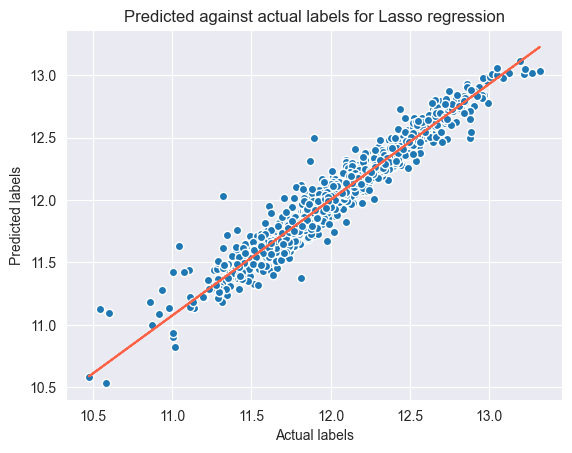

In [30]:
# Visualize the predicted vs actual labels for the training set for Lasso regression

# Predict the labels
predicted_labels = lasso.predict(X_train)

# Scatter plot
plt.scatter(y_train, predicted_labels, edgecolor = 'white')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Predicted against actual labels for Lasso regression')

# Overlay the regression line
z = np.polyfit(y_train, predicted_labels, 1)    # Fit a 1st-degree polynomial
p = np.poly1d(z)                                # Create a polynomial function from the coefficients
plt.plot(y_train, p(y_train), color = 'tomato') # Plot the line

# Display the plot
plt.show()

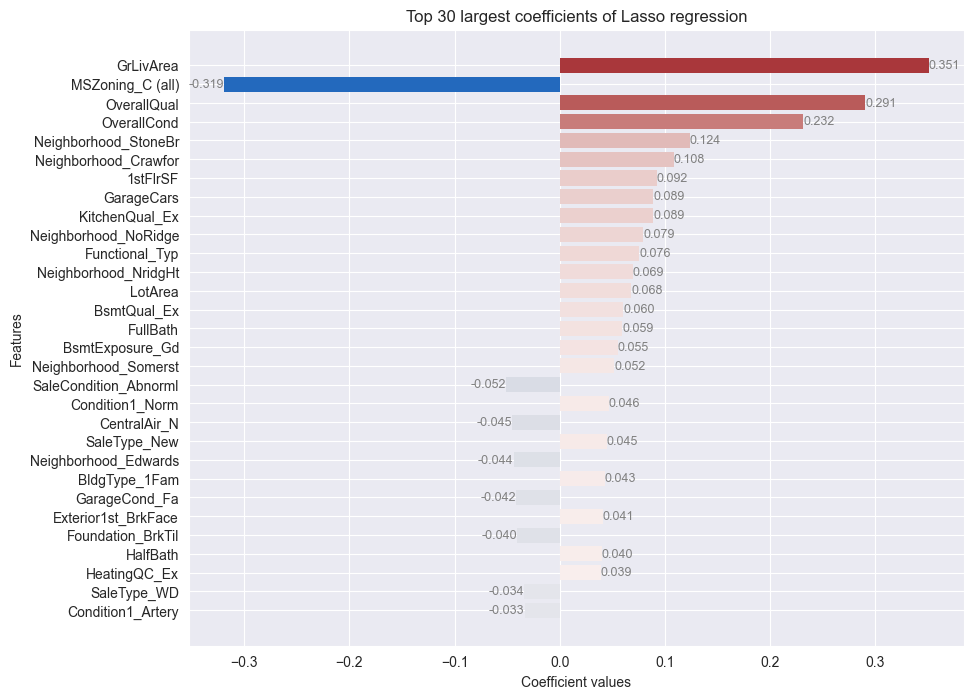

In [31]:
# Coefficients of Lasso regression

# Get feature names from X_train DataFrame
feature_names = df_en_tr.drop('SalePrice', axis = 1).columns

# Get the coefficients of the linear regression model
coefficients = lasso.coef_

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value and select the top 10 largest coefficients
coef_df['Absolute coefficient'] = coef_df['Coefficient'].abs()
top_coef_df = coef_df.nlargest(30, 'Absolute coefficient').reset_index(drop = True)

# Sort the DataFrame by 'Absolute Coefficient' in descending order
top_coef_df = top_coef_df.sort_values(by = 'Absolute coefficient')

# Create a custom colormap 
cmap = plt.get_cmap('vlag')
norm = plt.Normalize(top_coef_df['Coefficient'].min(), top_coef_df['Coefficient'].max())
colors = cmap(norm(top_coef_df['Coefficient']))

# Plot the top largest coefficients
plt.figure(figsize = (10, 8))
bars = plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'], color = colors, edgecolor = 'None')

# Set the title and labels
plt.xlabel('Coefficient values')
plt.ylabel('Features')
plt.title('Top 30 largest coefficients of Lasso regression')

# Annotate each bar with its coefficient value
for bar, coef in zip(bars, top_coef_df['Coefficient']):
    if coef != 0:  # Only annotate bars where the coefficient is not zero
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{coef:.3f}', ha = 'left' if coef > 0 else 'right', va = 'center', fontsize = 9, color = 'gray')

# Show the plot
plt.show()

### Ridge regression model: L2 regularization

In [32]:
# Define features (X) and target (y) for training set for Ridge regression
X_train = df_en_tr.drop('SalePrice', axis = 1)
y_train = df_en_tr['SalePrice']

# Construct a linear regression model
ridge = RidgeCV()

In [33]:
# Fit Lasso regression model to training data
ridge.fit(X_train, y_train)

RidgeCV()

In [34]:
# Metrics for Ridge regression

# Predict the label for the training set
y_train_pred = ridge.predict(X_train)

# Compute evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

# Create a dictionary for the results
results = {'model': 'ridge regression',
           'mae': mae,
           'mse': mse,
           'rmse': rmse,
           'r2': r2
           }

# Convert the dictionary to a DataFrame
ridge_results = pd.DataFrame([results])

# Display the results
ridge_results

model       mae       mse      rmse        r2
0  ridge regression  0.068001  0.009171  0.095764  0.939832

In [35]:
# Check predicted and actual labels for the training set for Ridge regression

# Print a sample of predicted labels with formatting
predicted_labels = ridge.predict(X_train)[:10]
print(*[f'{label:.2f}' for label in predicted_labels], sep=', ')

# Print a sample of actual labels with formatting
actual_labels = y_train[:10]
print(*[f'{label:.2f}' for label in actual_labels], sep=', ')

12.23, 12.15, 12.29, 12.06, 12.57, 12.55, 12.31, 11.68, 11.71, 11.78
12.25, 12.11, 12.32, 11.85, 12.43, 12.63, 12.21, 11.77, 11.68, 11.77


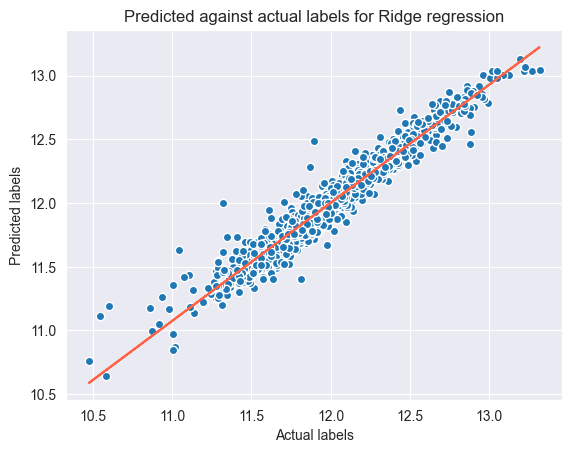

In [36]:
# Visualize the predicted vs actual labels for the training set for Ridge regression

# Predict the labels
predicted_labels = ridge.predict(X_train)

# Scatter plot
plt.scatter(y_train, predicted_labels, edgecolor = 'white')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Predicted against actual labels for Ridge regression')

# Overlay the regression line
z = np.polyfit(y_train, predicted_labels, 1)    # Fit a 1st-degree polynomial
p = np.poly1d(z)                                # Create a polynomial function from the coefficients
plt.plot(y_train, p(y_train), color = 'tomato') # Plot the line

# Display the plot
plt.show()

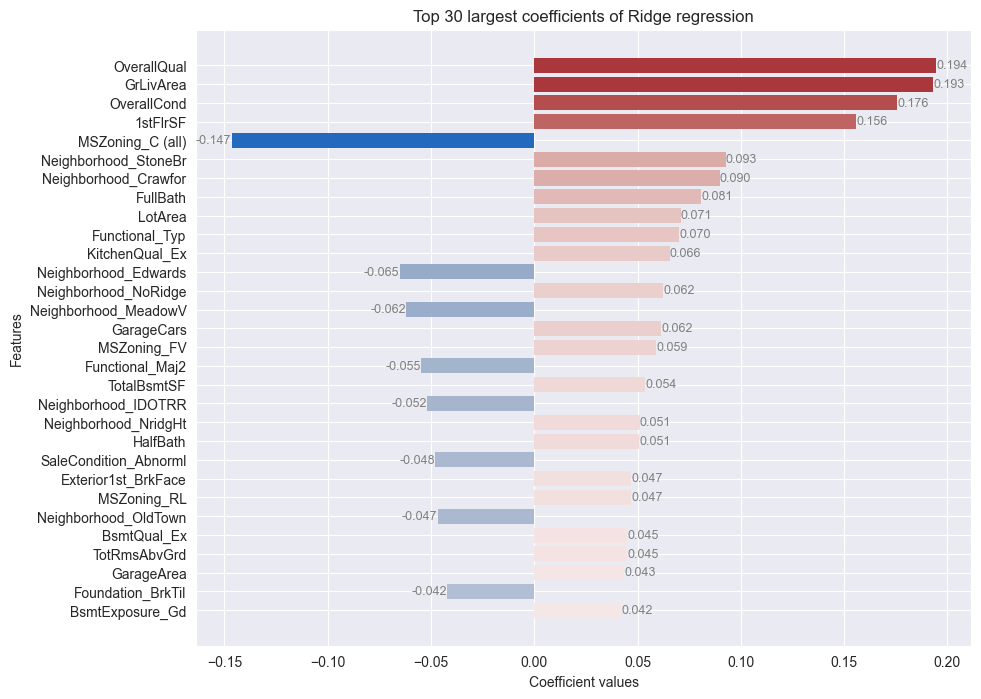

In [37]:
# Coefficients of Ridge regression

# Get feature names from X_train DataFrame
feature_names = df_en_tr.drop('SalePrice', axis = 1).columns

# Get the coefficients of the linear regression model
coefficients = ridge.coef_

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value and select the top 10 largest coefficients
coef_df['Absolute coefficient'] = coef_df['Coefficient'].abs()
top_coef_df = coef_df.nlargest(30, 'Absolute coefficient').reset_index(drop = True)

# Sort the DataFrame by 'Absolute Coefficient' in descending order
top_coef_df = top_coef_df.sort_values(by = 'Absolute coefficient')

# Create a custom colormap 
cmap = plt.get_cmap('vlag')
norm = plt.Normalize(top_coef_df['Coefficient'].min(), top_coef_df['Coefficient'].max())
colors = cmap(norm(top_coef_df['Coefficient']))

# Plot the top largest coefficients
plt.figure(figsize = (10, 8))
bars = plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'], color = colors, edgecolor = 'None')

# Set the title and labels
plt.xlabel('Coefficient values')
plt.ylabel('Features')
plt.title('Top 30 largest coefficients of Ridge regression')

# Annotate each bar with its coefficient value
for bar, coef in zip(bars, top_coef_df['Coefficient']):
    if coef != 0:  # Only annotate bars where the coefficient is not zero
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{coef:.3f}', ha = 'left' if coef > 0 else 'right', va = 'center', fontsize = 9, color = 'gray')

# Show the plot
plt.show()

### ElasticNet regularization model: L1 and L2 regularizations

In [38]:
# Define features (X) and target (y) for training set for ElasticNet regularization
X_train = df_en_tr.drop('SalePrice', axis = 1)
y_train = df_en_tr['SalePrice']

# Construct a linear regression model
net = ElasticNetCV()

In [39]:
# Fit ElasticNet regularization model to training data
net.fit(X_train, y_train)

ElasticNetCV()

In [40]:
# Metrics for ElasticNet regularization

# Predict the label for the training set
y_train_pred = lasso.predict(X_train)

# Compute evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

# Create a dictionary for the results
results = {'model': 'ElasticNet',
           'mae': mae,
           'mse': mse,
           'rmse': rmse,
           'r2': r2
           }

# Convert the dictionary to a DataFrame
net_results = pd.DataFrame([results])

# Display the results
net_results

model      mae       mse      rmse        r2
0  ElasticNet  0.06985  0.009606  0.098011  0.936975

In [41]:
# Check predicted and actual labels for the training set for ElasticNet regularization

# Print a sample of predicted labels with formatting
predicted_labels = net.predict(X_train)[:10]
print(*[f'{label:.2f}' for label in predicted_labels], sep=', ')

# Print a sample of actual labels with formatting
actual_labels = y_train[:10]
print(*[f'{label:.2f}' for label in actual_labels], sep=', ')

12.24, 12.16, 12.30, 12.06, 12.57, 12.55, 12.32, 11.68, 11.72, 11.79
12.25, 12.11, 12.32, 11.85, 12.43, 12.63, 12.21, 11.77, 11.68, 11.77


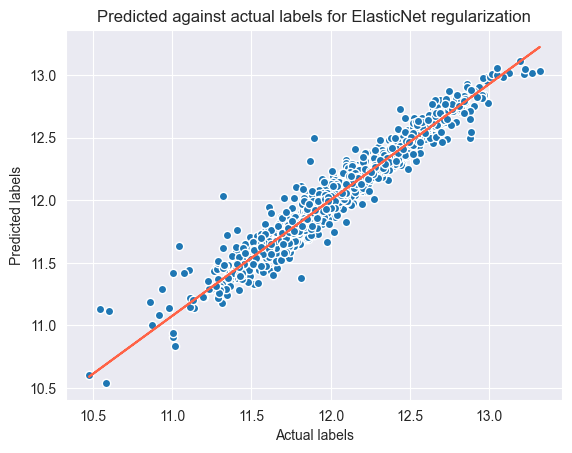

In [42]:
# Visualize the predicted vs actual labels for the training set for ElasticNet regularization

# Predict the labels
predicted_labels = net.predict(X_train)

# Scatter plot
plt.scatter(y_train, predicted_labels, edgecolor = 'white')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Predicted against actual labels for ElasticNet regularization')

# Overlay the regression line
z = np.polyfit(y_train, predicted_labels, 1)    # Fit a 1st-degree polynomial
p = np.poly1d(z)                                # Create a polynomial function from the coefficients
plt.plot(y_train, p(y_train), color = 'tomato') # Plot the line

# Display the plot
plt.show()

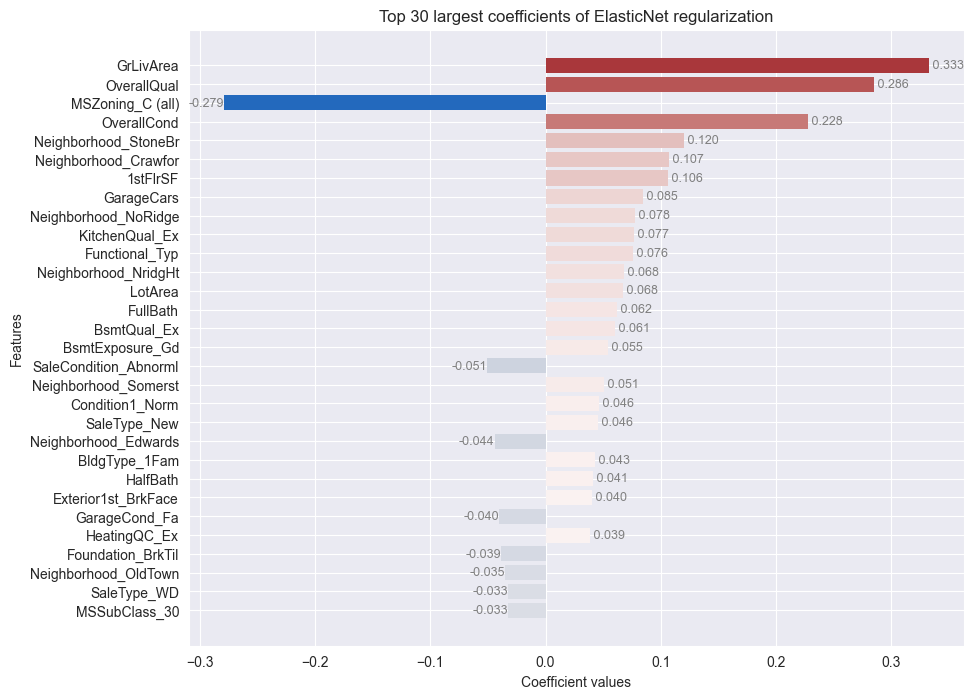

In [43]:
# Coefficients of ElasticNet regularization

# Get feature names from X_train DataFrame
feature_names = df_en_tr.drop('SalePrice', axis = 1).columns

# Get the coefficients of the linear regression model
coefficients = net.coef_

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value and select the top 10 largest coefficients
coef_df['Absolute coefficient'] = coef_df['Coefficient'].abs()
top_coef_df = coef_df.nlargest(30, 'Absolute coefficient').reset_index(drop = True)

# Sort the DataFrame by 'Absolute Coefficient' in descending order
top_coef_df = top_coef_df.sort_values(by = 'Absolute coefficient')

# Create a custom colormap 
cmap = plt.get_cmap('vlag')
norm = plt.Normalize(top_coef_df['Coefficient'].min(), top_coef_df['Coefficient'].max())
colors = cmap(norm(top_coef_df['Coefficient']))

# Plot the top 30 largest coefficients
plt.figure(figsize = (10, 8))
bars = plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'], color = colors, edgecolor = 'None')

# Set the title and labels
plt.xlabel('Coefficient values')
plt.ylabel('Features')
plt.title('Top 30 largest coefficients of ElasticNet regularization')

# Annotate each bar with its coefficient value
for bar, coef in zip(bars, top_coef_df['Coefficient']):
    if coef != 0:  # Only annotate bars where the coefficient is not zero
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                 f'{coef: .3f}', ha = 'left' if coef > 0 else 'right', va = 'center', fontsize = 9, color = 'gray')

# Show the plot
plt.show()

### Random forest model

In [44]:
# Define features (X) and target (y) for training set for random forest
X_train = df_en_tr.drop('SalePrice', axis = 1)
y_train = df_en_tr['SalePrice']

# Construct a random forest model
forest_reg = RandomForestRegressor(random_state = 42)

# Create a dictionary of hyperparameters to tune for the random forest
cv_params = {'max_depth' : [3, 5, 10],
             'max_features' : [0.2, 0.5, 0.8],
             'min_samples_leaf' : [30, 50, 100],
             'min_samples_split' : [30, 50, 100]
            }

# Define a custom scoring function for RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define scoring metrics
scoring = {'mae': make_scorer(mean_absolute_error),
           'mse': make_scorer(mean_squared_error),
           'rmse': make_scorer(rmse),
           'r2': make_scorer(r2_score)
           }

# Instantiate GridSearch
forest = GridSearchCV(forest_reg, cv_params, scoring = scoring, cv = 4, refit = 'r2')

In [45]:
# Generate a summary of the results from a GridSearchCV object for training a model
def make_results(model_name: str, model_object: GridSearchCV, metric: str) -> pd.DataFrame:
    '''
    Parameters:
        model_name (str): Name to be displayed for the model in the output table
        model_object (GridSearchCV): A fitted GridSearchCV object
        metric (str): Metrics to use for selecting the best model

    Returns:
        pd.DataFrame: A dataframe with the best model's metrics
    '''
    
    # Create a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'mae': 'mean_test_mae',
                   'mse': 'mean_test_mse',
                   'rmse': 'mean_test_rmse',
                   'r2': 'mean_test_r2'
                   }
    
    # Validate the input metric
    if metric not in metric_dict:
        raise ValueError(f"Invalid metric '{metric}'. Choose from 'mae', 'mse', 'rmse', or 'r2'.")
    
    # Get all the results from the CV and put them in a DataFrame
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the DataFrame with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax()]
    
    # Extract regression metrics from that row
    results = {'model': model_name,
               'mae': best_estimator_results.get('mean_test_mae', None),
               'mse': best_estimator_results.get('mean_test_mse', None),
               'rmse': best_estimator_results.get('mean_test_rmse', None),
               'r2': best_estimator_results.get('mean_test_r2', None)
               }
    
    # Create table of results
    table = pd.DataFrame([results])
    
    return table

In [46]:
# Fit the random forest model to the training data
forest.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [0.2, 0.5, 0.8],
                         'min_samples_leaf': [30, 50, 100],
                         'min_samples_split': [30, 50, 100]},
             refit='r2',
             scoring={'mae': make_scorer(mean_absolute_error, response_method='predict'),
                      'mse': make_scorer(mean_squared_error, response_method='predict'),
                      'r2': make_scorer(r2_score, response_method='predict'),
                      'rmse': make_scorer(rmse, response_method='predict')})

In [47]:
# Print the best parameters and score for the random forest
print(f'Best parameters: {forest.best_params_}')

Best parameters: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 30, 'min_samples_split': 30}


In [48]:
# Display performance metrics for random forest model
forest_results = make_results('random forest', forest, 'r2')
forest_results

model       mae       mse      rmse        r2
0  random forest  0.111737  0.026698  0.163037  0.824469

In [49]:
# Check predicted and actual labels for the training set for random forest

# Print a sample of predicted labels with formatting
predicted_labels = forest.predict(X_train)[:10]
print(*[f'{label:.2f}' for label in predicted_labels], sep=', ')

# Print a sample of actual labels with formatting
actual_labels = y_train[:10]
print(*[f'{label:.2f}' for label in actual_labels], sep=', ')

12.19, 11.98, 12.26, 12.09, 12.60, 12.57, 12.26, 12.00, 11.70, 11.80
12.25, 12.11, 12.32, 11.85, 12.43, 12.63, 12.21, 11.77, 11.68, 11.77


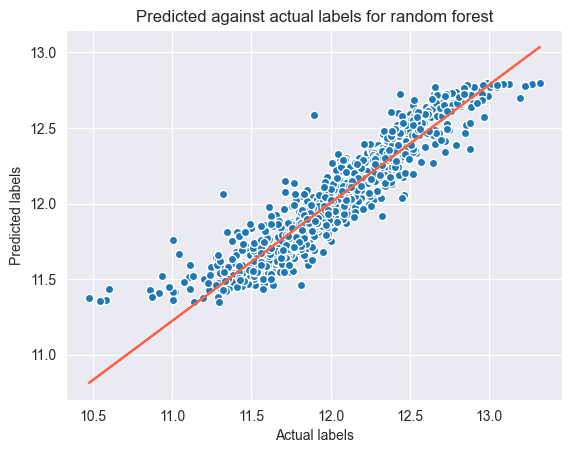

In [50]:
# Visualize the predicted vs actual labels for the training set for random forest

# Predict the labels
predicted_labels = forest.predict(X_train)

# Scatter plot
plt.scatter(y_train, predicted_labels, edgecolor = 'white')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Predicted against actual labels for random forest')

# Overlay the regression line
z = np.polyfit(y_train, predicted_labels, 1)    # Fit a 1st-degree polynomial
p = np.poly1d(z)                                # Create a polynomial function from the coefficients
plt.plot(y_train, p(y_train), color = 'tomato') # Plot the line

# Display the plot
plt.show()

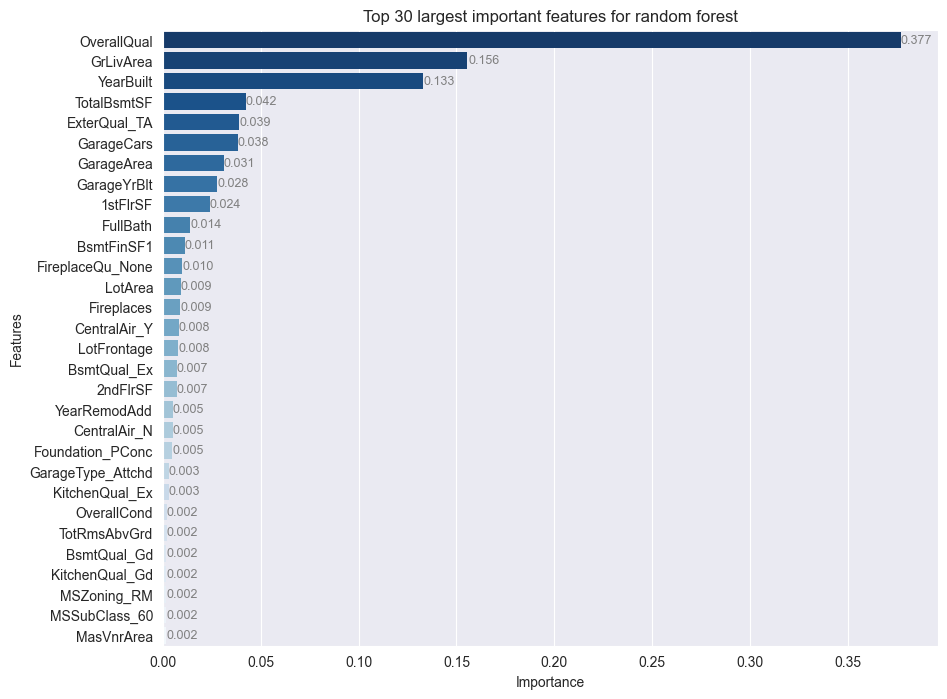

In [51]:
# Feature importance for random forest model
best_estimator = forest.best_estimator_

# Extract feature importances
feature_importance = best_estimator.feature_importances_

# Create a DataFrame to hold the importances, with feature names as index
forest_importance = pd.DataFrame(feature_importance, columns=['gini_importance'], index = X_train.columns)

# Sort feature importances in descending order and select the top 30 features
forest_importance_sorted = forest_importance.sort_values(by = 'gini_importance', ascending = False).head(30)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot top feature importances
plt.figure(figsize = (10, 8))
sns.barplot(x='gini_importance', y = forest_importance_sorted.index, data = forest_importance_sorted,
            hue = forest_importance_sorted.index, orient = 'h', edgecolor = 'None', palette = 'Blues_r')
plt.title('Top 30 largest important features for random forest')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate each bar with its importance value
for i in range(len(forest_importance_sorted)):
    importance = round(forest_importance_sorted['gini_importance'].iloc[i], 3)
    plt.text(importance, i, f'{importance:.3f}', ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

### XGBoost model

In [52]:
# Define features (X) and target (y) for training set for XGBoost
X_train = df_en_tr.drop('SalePrice', axis = 1)
y_train = df_en_tr['SalePrice']

# Construct the model
boost_reg = XGBRegressor(random_state = 42)

# Create a dictionary of hyperparameters to tune for the model
cv_params = {'max_depth': [3, 5, 10],
             'min_child_weight': [30, 50, 100],
             'learning_rate': [0.1, 0.3, 0.5],
              }

# Define a custom scoring function for RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define scoring metrics
scoring = {'mae': make_scorer(mean_absolute_error),
           'mse': make_scorer(mean_squared_error),
           'rmse': make_scorer(rmse),
           'r2': make_scorer(r2_score)
           }

# Instantiate GridSearch
boost = GridSearchCV(boost_reg, cv_params, scoring = scoring, cv = 4, refit = 'r2')

In [53]:
# Fit the XGBoost model to the training data
boost.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 10],
                         'min_child_weight': [30, 50, 100]},
             refit='r2',
             scoring={'mae': make_scorer(mean_absolute_error, response_method='predict'),
                      'mse': make_scorer(mean_squared_error, response_method='predict'),
                      'r2': make_scorer(r2_score, response_method='predict'),
                      'rmse': make_scorer(rmse, response_method='predict')})

In [54]:
# Print the best parameters and score for XGBoost
print(f'Best parameters: {boost.best_params_}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 30}


In [55]:
# Display performance metrics for XGBoost
boost_results = make_results('XGBoost', boost, 'r2')
boost_results

model       mae       mse      rmse        r2
0  XGBoost  0.084644  0.015013  0.122048  0.901452

In [56]:
# Check predicted and actual labels for the training set for XGBoost

# Print a sample of predicted labels with formatting
predicted_labels = boost.predict(X_train)[:10]
print(*[f'{label:.2f}' for label in predicted_labels], sep=', ')

# Print a sample of actual labels with formatting
actual_labels = y_train[:10]
print(*[f'{label:.2f}' for label in actual_labels], sep=', ')

12.21, 12.03, 12.23, 12.02, 12.58, 12.56, 12.24, 11.79, 11.72, 11.77
12.25, 12.11, 12.32, 11.85, 12.43, 12.63, 12.21, 11.77, 11.68, 11.77


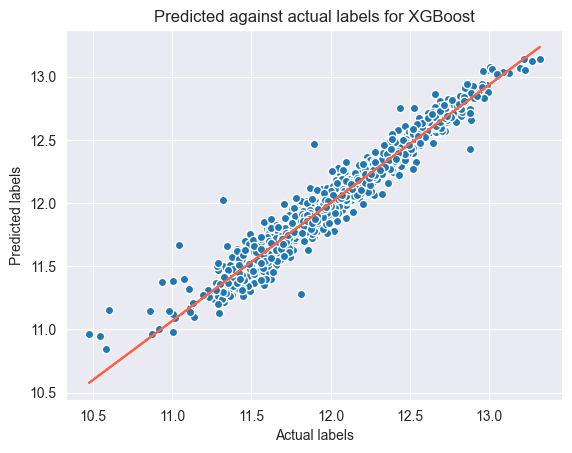

In [57]:
# Visualize the predicted vs actual labels for the training set for XGBoost

# Predict the labels
predicted_labels = boost.predict(X_train)

# Scatter plot
plt.scatter(y_train, predicted_labels, edgecolor = 'white')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Predicted against actual labels for XGBoost')

# Overlay the regression line
z = np.polyfit(y_train, predicted_labels, 1)    # Fit a 1st-degree polynomial
p = np.poly1d(z)                                # Create a polynomial function from the coefficients
plt.plot(y_train, p(y_train), color = 'tomato') # Plot the line

# Display the plot
plt.show()

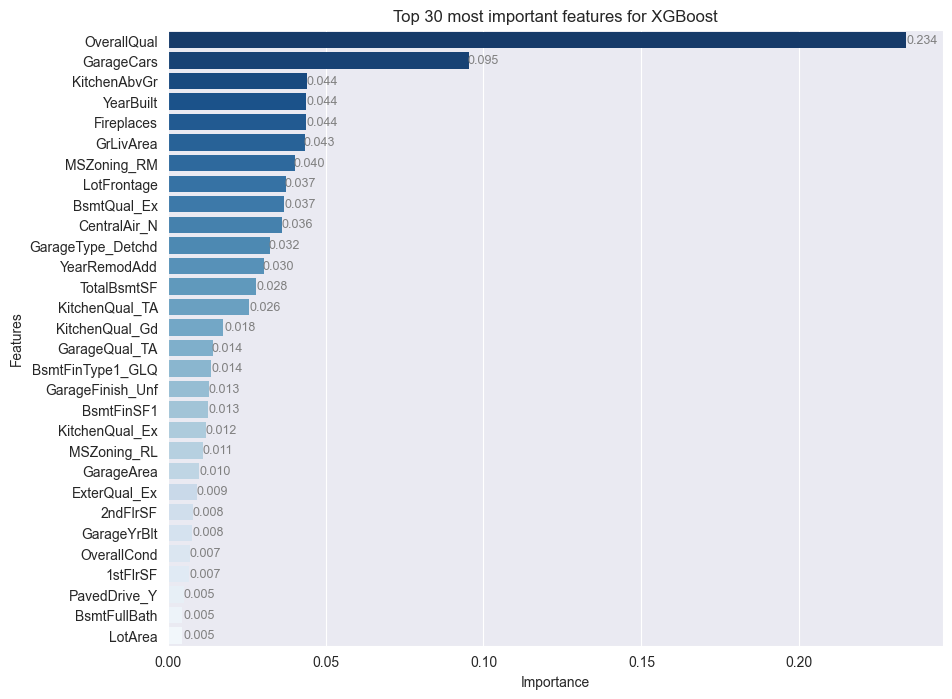

In [58]:
# Feature importance for XGBoost
best_estimator = boost.best_estimator_

# Extract feature importances
feature_importance = best_estimator.feature_importances_

# Create a DataFrame to hold the importances, with feature names as index
boost_importance = pd.DataFrame(feature_importance, columns=['gini_importance'], index = X_train.columns)

# Sort feature importances in descending order and select the top 30 features
boost_importance_sorted = boost_importance.sort_values(by = 'gini_importance', ascending = False).head(30)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot the top feature importances
plt.figure(figsize = (10, 8))
sns.barplot(x = 'gini_importance', y = boost_importance_sorted.index, data = boost_importance_sorted,
            hue = boost_importance_sorted.index, orient = 'h', edgecolor = 'None', palette = 'Blues_r')
plt.title('Top 30 most important features for XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate each bar with its importance value
for i in range(len(boost_importance_sorted)):
    importance = round(boost_importance_sorted['gini_importance'].iloc[i], 3)
    plt.text(importance, i, f'{importance:.3f}', ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

## Metric comparison

The best model should minimize the mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE) while maximizing the r-squared (R<sup>2</sup>). Other factors to consider include the model's interpretability, complexity, and computational efficiency.

In [59]:
# Compare the performance of different models

# Combine the DataFrames
combined_results = pd.concat([linear_results, lasso_results, ridge_results, net_results,
                              forest_results, boost_results], ignore_index = True)

# Ensure the column names are correct
combined_results.columns = ['model', 'mae', 'mse', 'rmse', 'r2']

# Display the combined results
print(combined_results)

               model       mae       mse      rmse        r2
0  linear regression  0.060643  0.007604  0.087202  0.950111
1   lasso regression  0.069850  0.009606  0.098011  0.936975
2   ridge regression  0.068001  0.009171  0.095764  0.939832
3         ElasticNet  0.069850  0.009606  0.098011  0.936975
4      random forest  0.111737  0.026698  0.163037  0.824469
5            XGBoost  0.084644  0.015013  0.122048  0.901452


## Sample submission

We generate a [sample submission](https://github.com/x-square/case_studies/blob/main/24_07_house_price_sample_submission.csv 'sample submission') to demonstrate the model's predictions. The submission file contains the Id and SalePrice columns.

In [60]:
# Submit predictions for the test set

# Define features (X) for prediction
X_test = df_en_te.drop('SalePrice', axis = 1)

# Predict using the trained model
y_test_pred = boost.predict(X_test)

# Apply inverse transformation if needed
predictions = np.expm1(y_test_pred)

# Create the submission DataFrame with formatted 'SalePrice'
start_id = 1461
submission = pd.DataFrame({'Id': range(start_id, start_id + len(predictions)),
                           'SalePrice': [f'{price:.2f}' for price in predictions]
                           })

# Display the DataFrame
print(submission.head())

# Save to a CSV file
submission.to_csv('24_07_house_price_sample_submission.csv', index = False)

     Id  SalePrice
0  1461  120627.16
1  1462  177622.50
2  1463  184764.81
3  1464  195299.53
4  1465  177502.78


# Executing Stage

During the executing stage, every step is carefully documented, including data processing, building models, analysing results, and making sample predictions. The best model is chosen after a thorough evaluation of its performance, while also considering potential biases. Feedback is collected, and adjustments are made as needed to clearly present the results.

## Conclusion

The project aims to predict house prices based on a dataset of house features. We construct various regression models and compare their performance for the best prediction. The best model should minimize the mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE) while maximizing the r-squared (R<sup>2</sup>). We will refine the model through hyperparameter optimization to enhance its predictive accuracy. The sample submission file demonstrates the model's predictions.